# InspireLab Technical Assessment Test

## Introduction

Full name: Bùi Quốc Thịnh

Email: quocthinh.bui.6339@gmail.com

Phone: +84 931 988 745

Purpose: This Jupyter Lab Notebook is for the Technical Assessment Test of InspireLab for the AI Engineer Fresher position.

## Table of content
- Import libraries
- About dataset
- Load dataset
- Overview dataset
- Data Analysis
- Feature Engineering
- Feature Selection
- Determine x, y and split the dataset
- Normalization
- Prediction Methods
- Comparison and choose the best model
- Save the best model

## Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import time
import scipy as sp
import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
import keras_tuner as kt
import pickle

## About dataset

### Context
The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

### Attribute information
- Invoice id: Computer generated sales slip invoice identification number
- Branch: Branch of supercenter (3 branches are available identified by A, B and C)
- City: Location of supercenters
- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card
- Gender: Gender type of customer
- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
- Unit price: Price of each product in $
- Quantity: Number of products purchased by customer
- Tax: 5% tax fee for customer buying
- Total: Total price including tax
- Date: Date of purchase (Record available from January 2019 to March 2019)
- Time: Purchase time (10am to 9pm)
- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
- COGS: Cost of goods sold
- Gross margin percentage: Gross margin percentage
= Gross income: Gross income
- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

## Load dataset

In [2]:
supermarket = pd.read_csv("supermarket_sales - Sheet1.csv")
print("Shape of dataset:\t", supermarket.shape)
supermarket.head()

Shape of dataset:	 (1000, 17)


Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

## Overview dataset

In [3]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
supermarket.describe()

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count              1000.000000   1000.000000  1000.00000  
mean                  4.761905     15.379369     6.97270  
std                   0.000000     11.708825     1.71858  
min                   4.761905      0.508500     4.00000  
25%                   4.761905      5.924875     5.50000  
50%                   4.761905     12.088000     7.00000  
75%                   4.761905     22.445250     8.50000  
max                   4.761905     49.650000    10.00000

In [5]:
supermarket.describe(include = object)

Invoice ID Branch    City Customer type  Gender         Product line  \
count          1000   1000    1000          1000    1000                 1000   
unique         1000      3       3             2       2                    6   
top     750-67-8428      A  Yangon        Member  Female  Fashion accessories   
freq              1    340     340           501     501                  178   

            Date   Time  Payment  
count       1000   1000     1000  
unique        89    506        3  
top     2/7/2019  19:48  Ewallet  
freq          20      7      345

In [6]:
print("\tTHE NUMBER OF UNIQUE VALUES BY COLUMNS:")
supermarket.nunique()

	THE NUMBER OF UNIQUE VALUES BY COLUMNS:


Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [7]:
supermarket.duplicated().any()

False

In [8]:
print("Number of NaN values:\t", supermarket.isna().sum().sum())

Number of NaN values:	 0


#### The percentage of missing values for each feature

In [9]:
# Calculate missing value counts
missing_values = supermarket.isnull().sum()
  
# Calculate total number of values per feature
total_values = supermarket.shape[0]

# Calculate missing value percentages
missing_percentages = (missing_values / total_values) * 100

missing_value_df = pd.DataFrame({'Feature': missing_values.index, 'Missing Value (%)': missing_percentages})
missing_value_df

Feature  Missing Value (%)
Invoice ID                            Invoice ID                0.0
Branch                                    Branch                0.0
City                                        City                0.0
Customer type                      Customer type                0.0
Gender                                    Gender                0.0
Product line                        Product line                0.0
Unit price                            Unit price                0.0
Quantity                                Quantity                0.0
Tax 5%                                    Tax 5%                0.0
Total                                      Total                0.0
Date                                        Date                0.0
Time                                        Time                0.0
Payment                                  Payment                0.0
cogs                                        cogs                0.0
gross margin percentage  gross margin percentage                0.0
gross income                        gross income                0.0
Rating                                    Rating                0.0

## Data Analysis

In [10]:
supermarket_2 = supermarket.copy()
colors = ['#57d57b', '#9653fb', '#c585a5', '#e2720d', '#f9eda9', '#0d71b9', '#959512', '#bf86ec', '#630e66', '#8841e5']

### Histogram

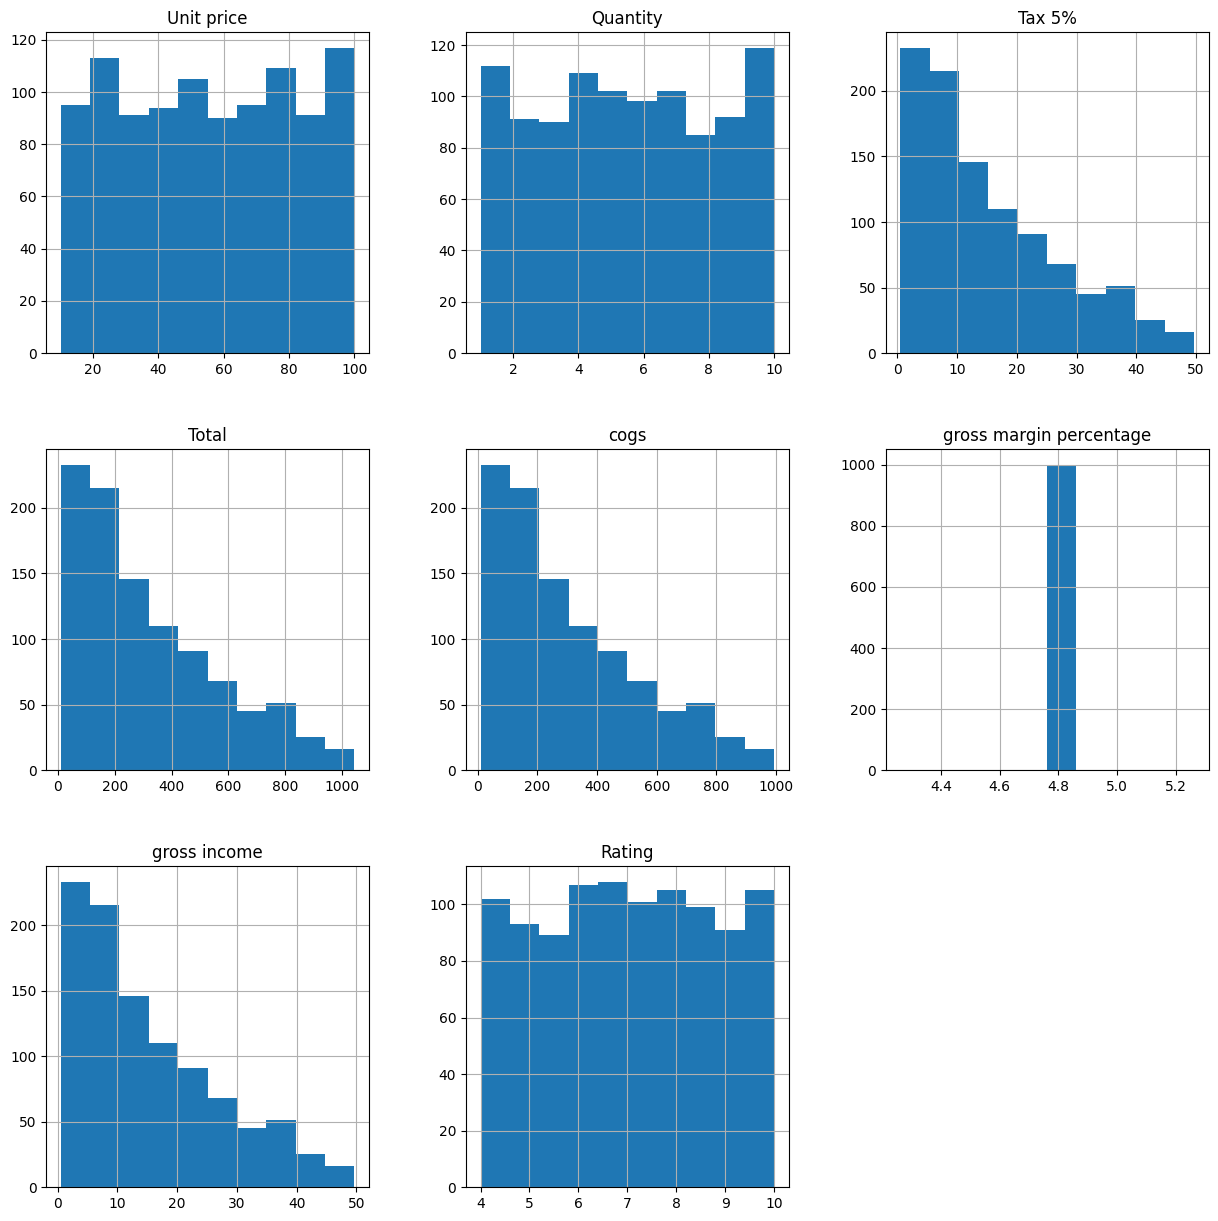

In [11]:
supermarket_2.hist(figsize=(15, 15))
plt.show()

  ### Branch

The best time that customers come to each branch.


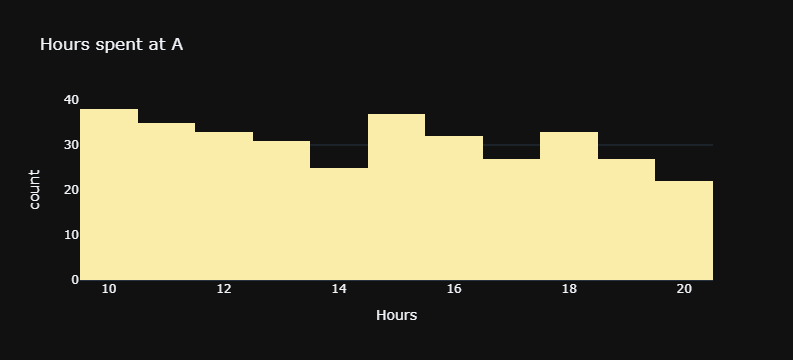

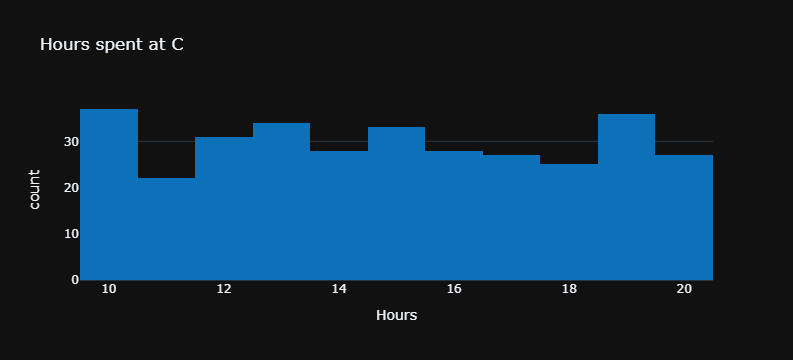

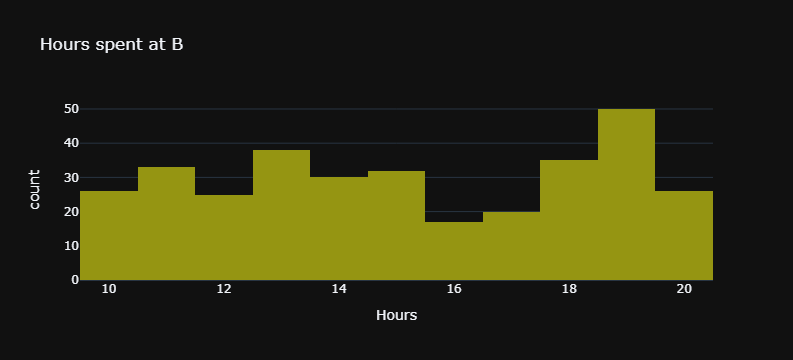

In [12]:
print("The best time that customers come to each branch.")

# Convert 'Time' column to datetime
supermarket_2['Time'] = pd.to_datetime(supermarket_2['Time'])

# Extract hour from 'Time' and create a new column 'Hours'
supermarket_2["Hours"] = supermarket_2["Time"].dt.hour

# Get unique branches
unique_branches = supermarket_2['Branch'].unique()

# Iterate over unique branches
for i, branch in enumerate(unique_branches, start=4):
    # Filter data for the current branch
    branch_data = supermarket_2[supermarket_2['Branch'] == branch]
    
    fig = px.histogram(branch_data, x='Hours', 
                       title=f'Hours spent at {branch}', 
                       color_discrete_sequence=[colors[i]], 
                       template='plotly_dark')
    
    i += 1
    iplot(fig)

Branch A seems to have the highest customer traffic at 10 and 15.

Branch B appears to have the peak customer influx at 19.

For Branch A, it appears that the optimal times for customer visits are 10 and 19.

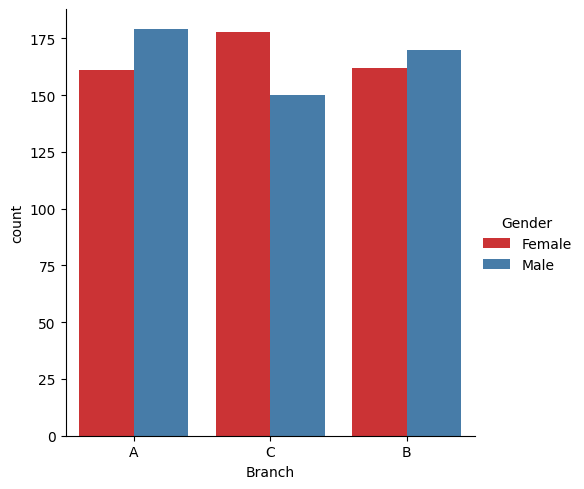

In [13]:
# Plot count of customers by gender at each branch
sns.catplot(data=supermarket_2, 
            x="Branch", 
            hue="Gender", 
            palette="Set1", 
            kind="count")
plt.show()

### City

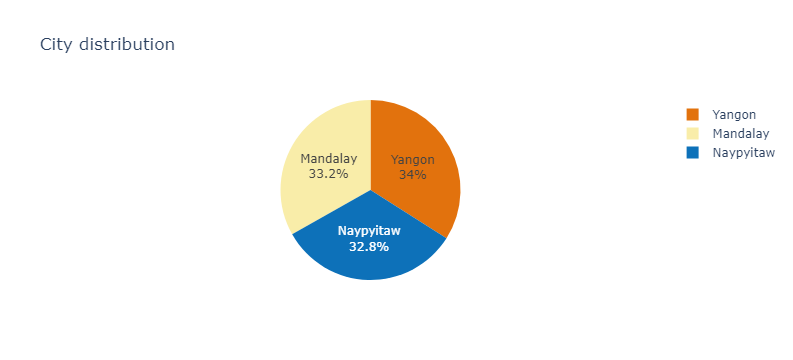

In [14]:
# Calculate the count of each city
count_of_city = supermarket_2['City'].value_counts()

fig = px.pie(values=count_of_city.values,
             names=['Yangon', 'Mandalay', 'Naypyitaw'],
             title='City distribution',
             color_discrete_sequence=[colors[3], colors[4], colors[5]], 
             labels={'label': 'City'}
            )

fig.update_traces(textinfo='percent+label')
iplot(fig)

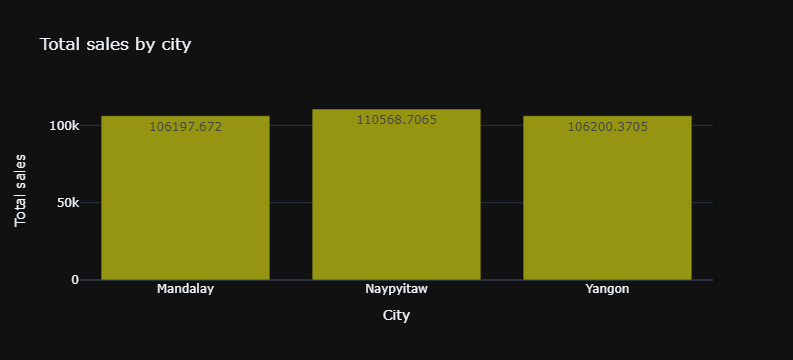

In [15]:
supermarket_3 = supermarket.copy()

# Group data by city and calculate the sum of prices
total_sales_by_city = supermarket_3.groupby(['City']).sum()

fig = px.bar(total_sales_by_city, 
             x=total_sales_by_city.index, 
             y='Total',
             labels={'Total': 'Total sales'},
             title="Total sales by city",
             color_discrete_sequence=[colors[6]], 
             template='plotly_dark',
             text='Total')

iplot(fig)

### Quantity

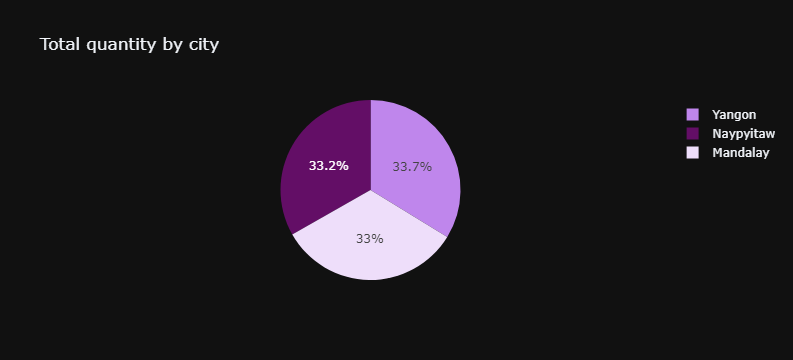

In [16]:
# Group data by city and calculate the sum of quantities
sum_of_quantity_by_city = supermarket_2.groupby(['City']).agg({'Quantity': 'sum'}).reset_index()

fig = px.pie(sum_of_quantity_by_city, 
             values='Quantity', 
             names='City',
             title='Total quantity by city',
             color_discrete_sequence=[colors[7], colors[8]],
             template='plotly_dark')

iplot(fig)

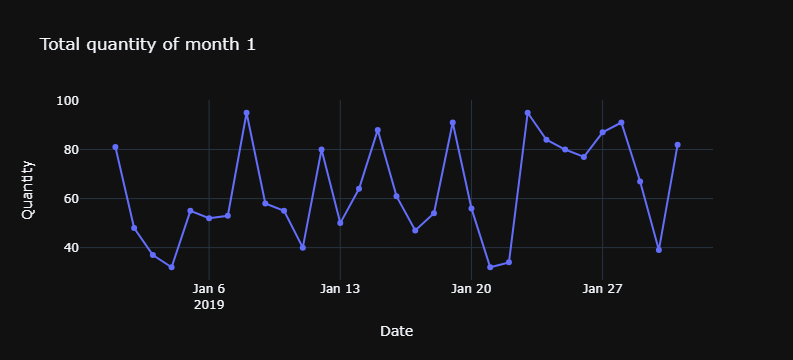

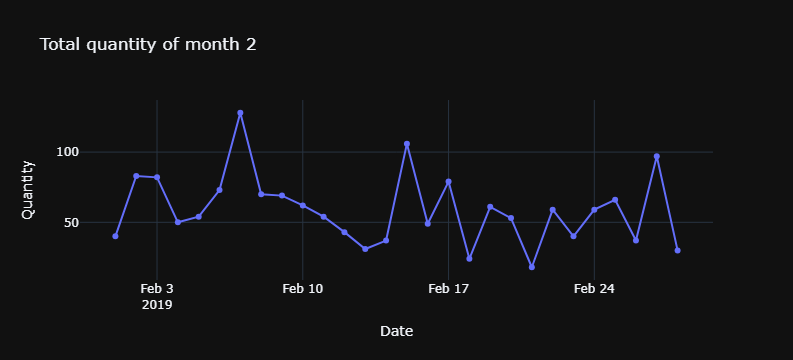

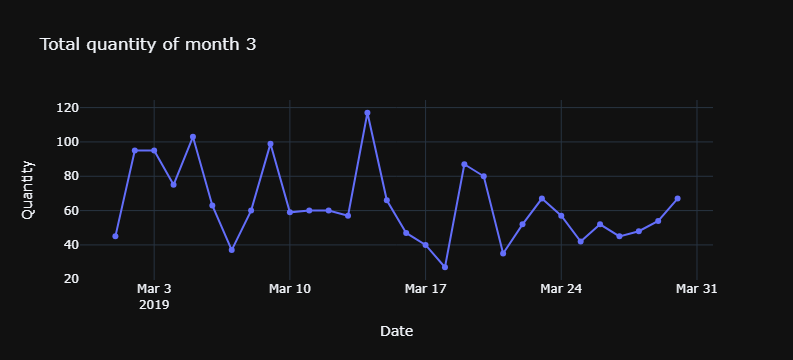

In [17]:
# Convert 'Date' column to datetime
supermarket_2['Date'] = pd.to_datetime(supermarket_2['Date'])

# Extract month from 'Date' and create a new column 'Month'
supermarket_2['Month'] = supermarket_2['Date'].dt.month

# Group data by date and month, and calculate the sum of quantities
sum_of_quantity_by_month = supermarket_2.groupby(['Date', 'Month']).agg({'Quantity':'sum'}).reset_index()

# Get unique months
unique_months = sum_of_quantity_by_month['Month'].unique()

# Iterate over unique months
for month in unique_months:
    month_data = sum_of_quantity_by_month[sum_of_quantity_by_month['Month'] == month]

    fig = px.line(month_data, x='Date', y='Quantity',
                  title=f'Total quantity of month {month}',
                  markers=True,
                  template='plotly_dark')
    
    iplot(fig)

### Gender

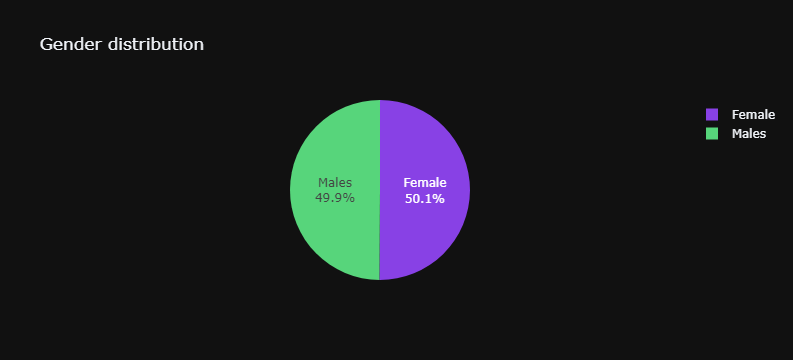

In [18]:
# Calculate the count of each gender
gender_counts = supermarket_2['Gender'].value_counts()

fig = px.pie(values=gender_counts.values,
             names=['Female', 'Males'],
             title='Gender distribution',
             color_discrete_sequence=[colors[9], colors[0]],
             template='plotly_dark')

# Add percentage labels to the pie chart
fig.update_traces(textinfo='percent+label')

iplot(fig)

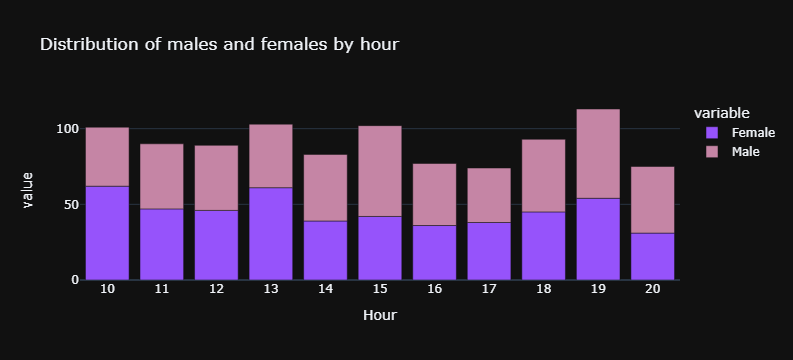

In [19]:
# Extract hour from 'Time' column and create a new column 'Hour'
supermarket_2['Hour'] = supermarket_2['Time'].dt.hour

# Group data by hour and gender, and calculate the count of each combination
hour_gender = supermarket_2.groupby(['Hour', 'Gender']).size().unstack(fill_value=0).reset_index()

# Rename columns for clarity
hour_gender.rename(columns={'Female': 'Female', 'Male': 'Male'}, inplace=True)

fig = px.bar(hour_gender, 
             y=['Female', 'Male'],
             x='Hour',
             title='Distribution of males and females by hour',
             color_discrete_sequence=[colors[1], colors[2]],
             template='plotly_dark'
            ).update_xaxes(type='category')

iplot(fig)

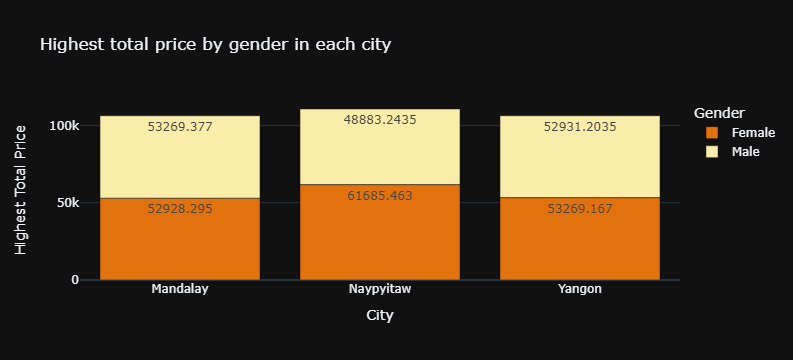

In [20]:
# Group data by city and gender, and calculate the sum of total prices
total_price_by_city_gender = supermarket_2.groupby(['City', 'Gender']).agg({'Total': 'sum'}).reset_index()

fig = px.bar(total_price_by_city_gender, 
             x='City', 
             y='Total',
             color='Gender',
             labels={'Total': 'Highest Total Price'},
             title="Highest total price by gender in each city",
             color_discrete_sequence=[colors[3], colors[4]],  
             template='plotly_dark',
             text='Total')

iplot(fig)

### Product line

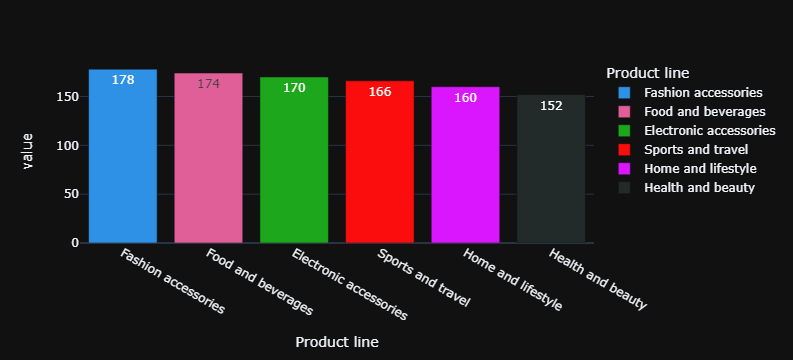

In [21]:
# Calculate the count of each product line
product_line_counts = supermarket_2['Product line'].value_counts()

fig = px.bar(product_line_counts,
             color=product_line_counts.index,
             color_discrete_sequence=px.colors.qualitative.Dark24,
             text_auto=True,
             labels=dict(y='Product line counts', x='Sum'),
             template='plotly_dark')

iplot(fig)

### Customer class

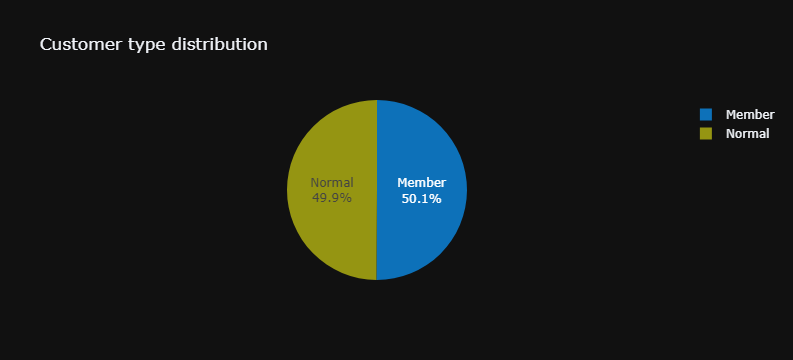

In [22]:
# Calculate the count of each customer type
customer_type_counts = supermarket_2['Customer type'].value_counts()

fig = px.pie(values=customer_type_counts.values,
             names=['Member', 'Normal'],
             title='Customer type distribution',
             color_discrete_sequence=[colors[5], colors[6]], 
             template='plotly_dark')

fig.update_traces(textinfo='percent+label')

iplot(fig)

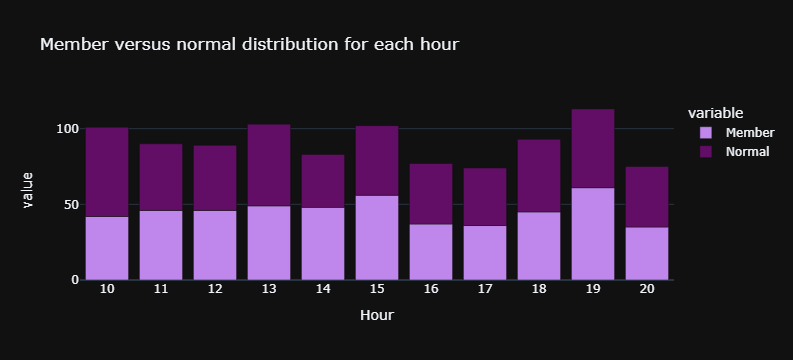

In [23]:
# Group data by hour and customer type, and calculate the count of each combination
hour_customer_type = supermarket_2.groupby(['Hour', 'Customer type']).size().unstack(fill_value=0).reset_index()

# Rename columns for clarity
hour_customer_type.rename(columns={'Member': 'Member', 'Normal': 'Normal'}, inplace=True)

fig = px.bar(hour_customer_type, 
             y=['Member', 'Normal'],
             x='Hour',
             title='Member versus normal distribution for each hour',
             color_discrete_sequence=[colors[7], colors[8]],
             template='plotly_dark'
            ).update_xaxes(type='category')

iplot(fig)

### Date

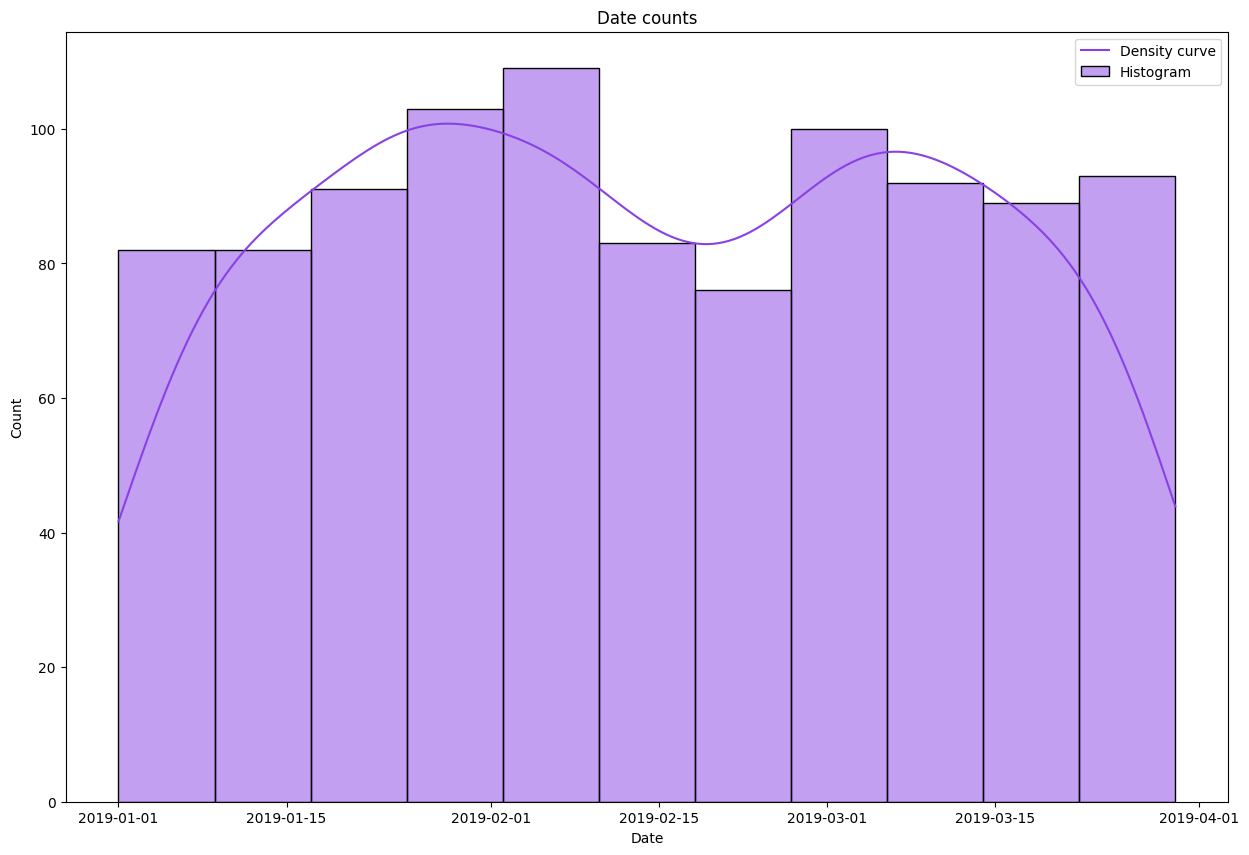

In [24]:
plt.figure(figsize=(15, 10))

# Create a histogram plot with a density curve
sns.histplot(supermarket_2['Date'], kde=True, color=colors[9])

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Date counts')

plt.legend(['Density curve', 'Histogram'])

plt.show()

### Tax

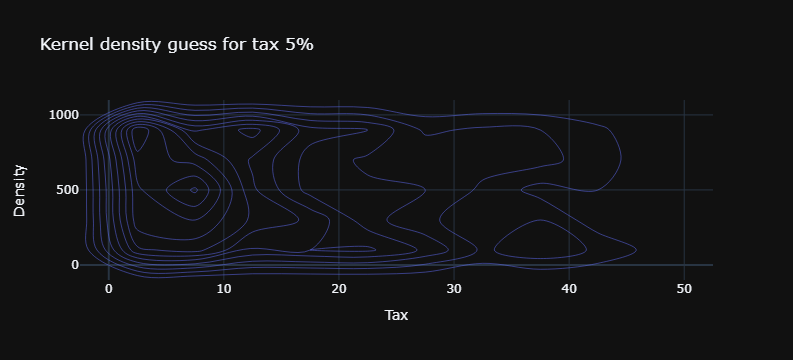

In [25]:
# Create a density contour plot for Tax 5%
fig = px.density_contour(supermarket_2, x='Tax 5%',
                         title='Kernel density guess for tax 5%',
                         labels={'Tax 5%': 'Tax 5%'},
                         template='plotly_dark')

# Update layout to set axis titles
fig.update_layout(xaxis_title='Tax', yaxis_title='Density')

# Show the plot
fig.show()

### Payment

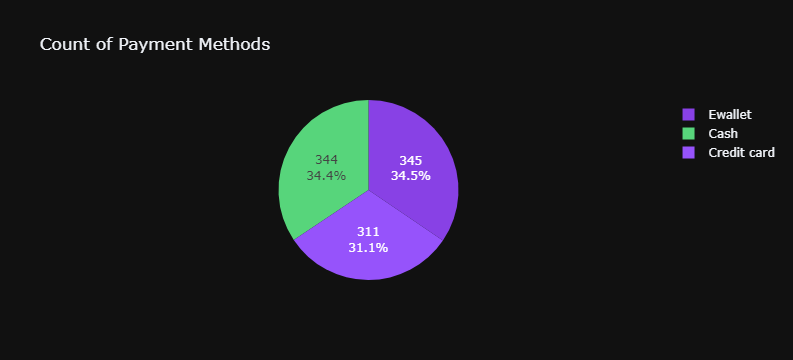

In [26]:
# Calculate the count of each payment method
payment_counts = supermarket_2['Payment'].value_counts()

fig = px.pie(values=payment_counts.values,
             names=['Ewallet', 'Cash', 'Credit card'],
             color_discrete_sequence=[colors[9], colors[0], colors[1]],  
             template='plotly_dark',
             title="Count of Payment Methods")

fig.update_traces(textinfo='value+percent')

iplot(fig)

## Feature Engineering

### Take 'Time' column and adds a new column 'Time Period' categorizing times into morning, afternoon, or evening

In [27]:
supermarket["Time Period"] = pd.to_datetime(supermarket["Time"], format="%H:%M").dt.hour
supermarket["Time Period"] = pd.cut(supermarket["Time Period"], bins=[0, 12, 18, 24], labels=["Morning", "Afternoon", "Evening"])

In [28]:
supermarket.head(5)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  \
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1   
1  10:29         Cash   76.40                 4.761905        3.8200     9.6   
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4   
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4   
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3   

  Time Period  
0   Afternoon  
1     Morning  
2   Afternoon  
3     Evening  
4     Morning

### Take 'Date' column and adds a new column 'Season' categorizing dates into spring, summer, autumn and winter

In [29]:
supermarket["Date"] = pd.to_datetime(supermarket["Date"], format="%m/%d/%Y")
supermarket["Month"] = supermarket["Date"].dt.month
    
season_map = {
  1: "Spring",
  2: "Spring",
  3: "Spring",
  4: "Summer",
  5: "Summer",
  6: "Summer",
  7: "Autumn",
  8: "Autumn",
  9: "Autumn",
  10: "Winter",
  11: "Winter",
  12: "Winter"
}

supermarket["Season"] = supermarket["Month"].map(season_map)

In [30]:
supermarket.head(5)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715 2019-01-05   
1  Electronic accessories       15.28         5   3.8200   80.2200 2019-03-08   
2      Home and lifestyle       46.33         7  16.2155  340.5255 2019-03-03   
3       Health and beauty       58.22         8  23.2880  489.0480 2019-01-27   
4       Sports and travel       86.31         7  30.2085  634.3785 2019-02-08   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  \
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1   
1  10:29         Cash   76.40                 4.761905        3.8200     9.6   
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4   
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4   
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3   

  Time Period  Month  Season  
0   Afternoon      1  Spring  
1     Morning      3  Spring  
2   Afternoon      3  Spring  
3     Evening      1  Spring  
4     Morning      2  Spring

In [31]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [32]:
supermarket.head(5)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715 2019-01-05   
1  Electronic accessories       15.28         5   3.8200   80.2200 2019-03-08   
2      Home and lifestyle       46.33         7  16.2155  340.5255 2019-03-03   
3       Health and beauty       58.22         8  23.2880  489.0480 2019-01-27   
4       Sports and travel       86.31         7  30.2085  634.3785 2019-02-08   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  \
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1   
1  10:29         Cash   76.40                 4.761905        3.8200     9.6   
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4   
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4   
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3   

  Time Period  Month  Season  
0   Afternoon      1  Spring  
1     Morning      3  Spring  
2   Afternoon      3  Spring  
3     Evening      1  Spring  
4     Morning      2  Spring

### OneHotEncoding

In [33]:
categorical_columns = ['City', 'Customer type', 'Gender', 'Product line', 'Payment', 'Time Period']

# Instantiate the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_features = encoder.fit_transform(supermarket[categorical_columns])

# Get the feature names for the encoded features
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)

# Create a dataframe for the encoded features
supermarket_encoded = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Concatenate the encoded features with the original dataframe
supermarket = pd.concat([supermarket.drop(columns=categorical_columns), supermarket_encoded], axis=1)

supermarket.head(5)

Invoice ID Branch  Unit price  Quantity   Tax 5%     Total       Date  \
0  750-67-8428      A       74.69         7  26.1415  548.9715 2019-01-05   
1  226-31-3081      C       15.28         5   3.8200   80.2200 2019-03-08   
2  631-41-3108      A       46.33         7  16.2155  340.5255 2019-03-03   
3  123-19-1176      A       58.22         8  23.2880  489.0480 2019-01-27   
4  373-73-7910      A       86.31         7  30.2085  634.3785 2019-02-08   

    Time    cogs  gross margin percentage  ...  \
0  13:08  522.83                 4.761905  ...   
1  10:29   76.40                 4.761905  ...   
2  13:23  324.31                 4.761905  ...   
3  20:33  465.76                 4.761905  ...   
4  10:37  604.17                 4.761905  ...   

   Product line_Food and beverages  Product line_Health and beauty  \
0                              0.0                             1.0   
1                              0.0                             0.0   
2                              0.0                             0.0   
3                              0.0                             1.0   
4                              0.0                             0.0   

   Product line_Home and lifestyle Product line_Sports and travel  \
0                              0.0                            0.0   
1                              0.0                            0.0   
2                              1.0                            0.0   
3                              0.0                            0.0   
4                              0.0                            1.0   

   Payment_Cash  Payment_Credit card  Payment_Ewallet  Time Period_Afternoon  \
0           0.0                  0.0              1.0                    1.0   
1           1.0                  0.0              0.0                    0.0   
2           0.0                  1.0              0.0                    1.0   
3           0.0                  0.0              1.0                    0.0   
4           0.0                  0.0              1.0                    0.0   

   Time Period_Evening  Time Period_Morning  
0                  0.0                  0.0  
1                  0.0                  1.0  
2                  0.0                  0.0  
3                  1.0                  0.0  
4                  0.0                  1.0  

[5 rows x 33 columns]

## Feature Selection

After some analysis, some features do not have much impact on the model so I decide to delete them

In [34]:
supermarket.drop(columns=["Branch", "Invoice ID", "gross margin percentage", "Date", "Time", "Season"], inplace=True, axis=1)

Text(0.5, 1.0, 'Correlation Between Features')

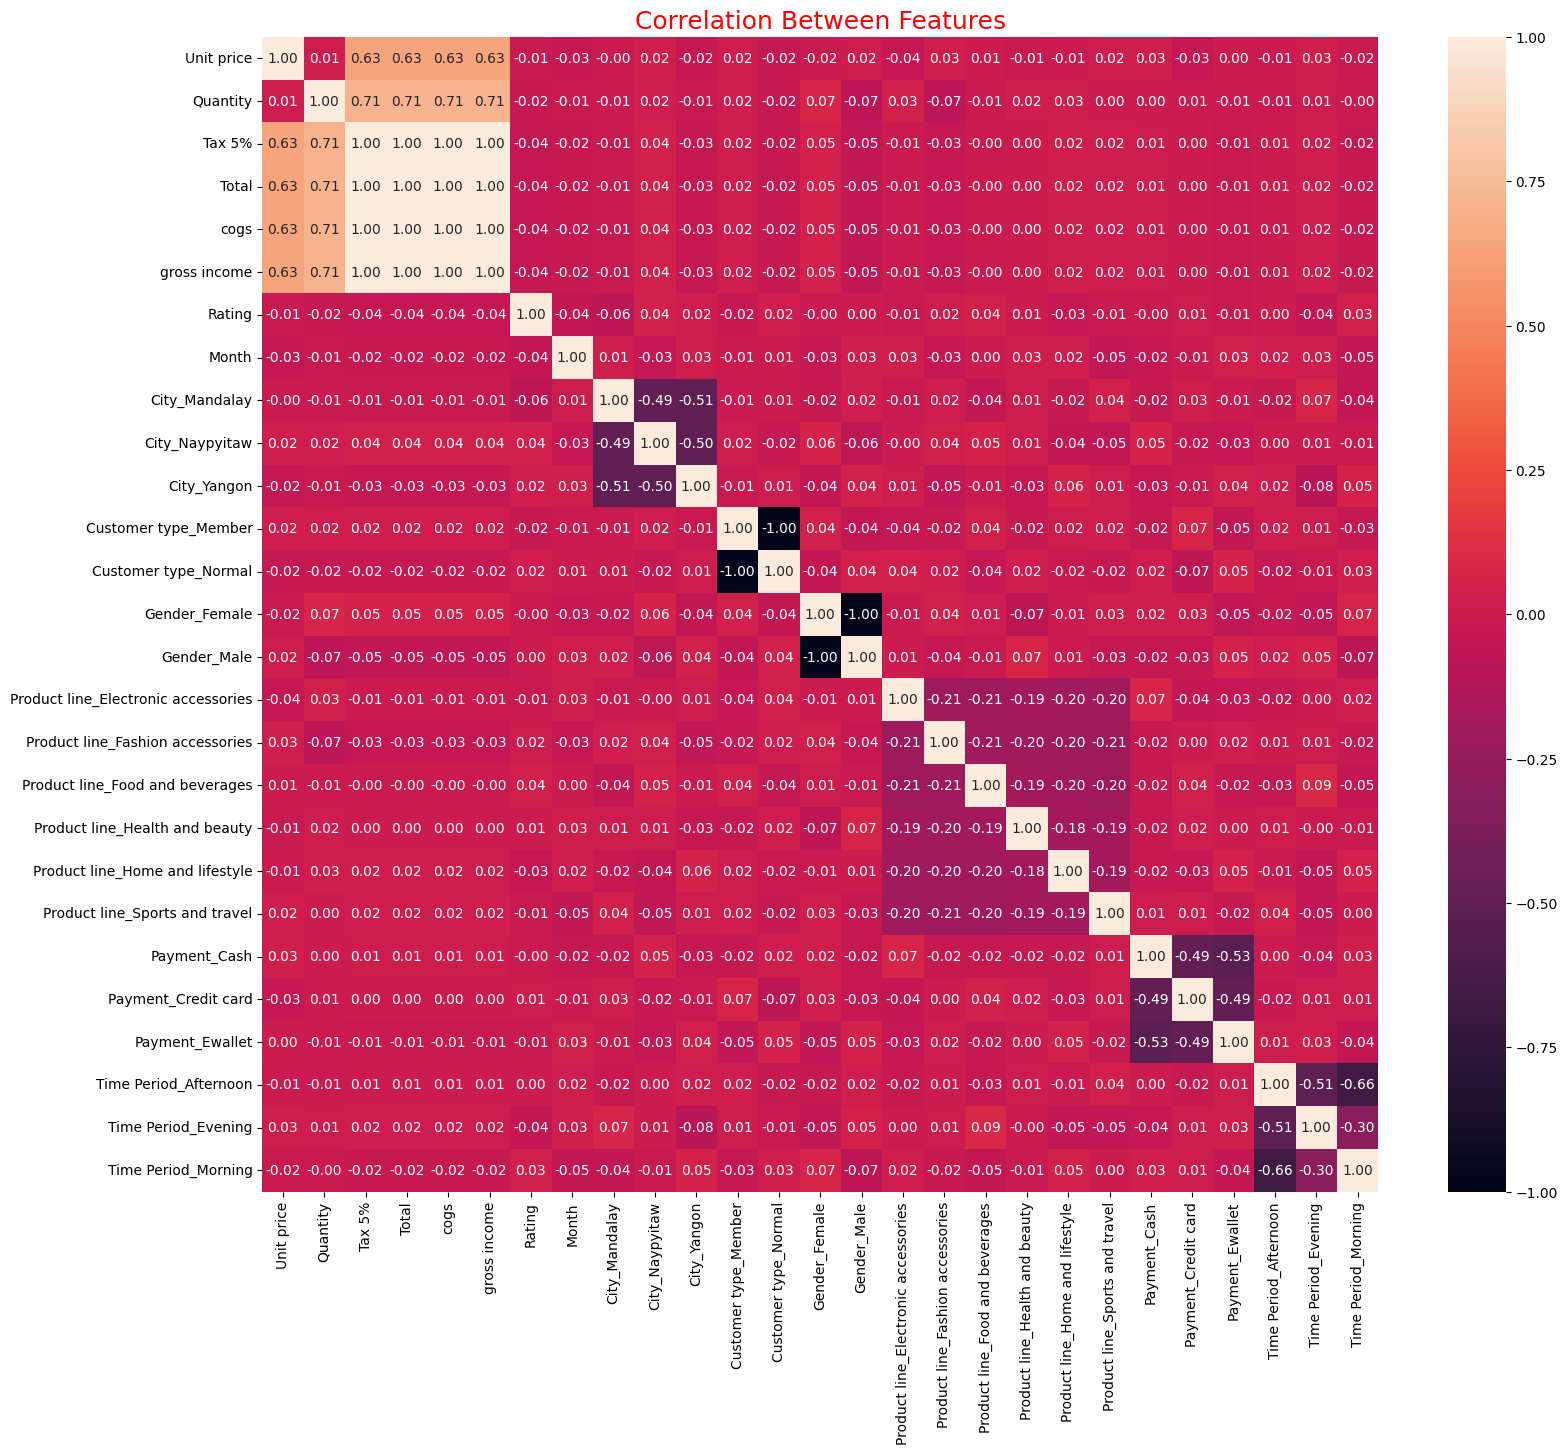

In [35]:
plt.figure(figsize=(18, 15))
sns.heatmap(supermarket.corr(), annot=True, fmt=".2f")
plt.title("Correlation Between Features", fontsize=18, color="red")

In [36]:
supermarket.head(5)

Unit price  Quantity   Tax 5%     Total    cogs  gross income  Rating  \
0       74.69         7  26.1415  548.9715  522.83       26.1415     9.1   
1       15.28         5   3.8200   80.2200   76.40        3.8200     9.6   
2       46.33         7  16.2155  340.5255  324.31       16.2155     7.4   
3       58.22         8  23.2880  489.0480  465.76       23.2880     8.4   
4       86.31         7  30.2085  634.3785  604.17       30.2085     5.3   

   Month  City_Mandalay  City_Naypyitaw  ...  Product line_Food and beverages  \
0      1            0.0             0.0  ...                              0.0   
1      3            0.0             1.0  ...                              0.0   
2      3            0.0             0.0  ...                              0.0   
3      1            0.0             0.0  ...                              0.0   
4      2            0.0             0.0  ...                              0.0   

   Product line_Health and beauty  Product line_Home and lifestyle  \
0                             1.0                              0.0   
1                             0.0                              0.0   
2                             0.0                              1.0   
3                             1.0                              0.0   
4                             0.0                              0.0   

   Product line_Sports and travel  Payment_Cash  Payment_Credit card  \
0                             0.0           0.0                  0.0   
1                             0.0           1.0                  0.0   
2                             0.0           0.0                  1.0   
3                             0.0           0.0                  0.0   
4                             1.0           0.0                  0.0   

   Payment_Ewallet  Time Period_Afternoon  Time Period_Evening  \
0              1.0                    1.0                  0.0   
1              0.0                    0.0                  0.0   
2              0.0                    1.0                  0.0   
3              1.0                    0.0                  1.0   
4              1.0                    0.0                  0.0   

   Time Period_Morning  
0                  0.0  
1                  1.0  
2                  0.0  
3                  0.0  
4                  1.0  

[5 rows x 27 columns]

In [37]:
# # Save the DataFrame to a CSV file
# supermarket.to_csv('encoded_data.csv', index=False)

## Determine x, y and split the data

Due to lack of data and the data only have 1000 rows. I decided to not split the validation dataset, so the validation dataset and test dataset is the same.

In [38]:
X = supermarket.drop("Total", axis=1) 
y = supermarket["Total"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (800, 26)
X_test:  (200, 26)
y_train:  (800,)
y_test:  (200,)


## Normalization

No need to scale because the values of each feature are relatively close and low

In [40]:
standard_scaler = StandardScaler()
# X_train_scaled = standard_scaler.fit_transform(X_train)
# X_test_scaled = standard_scaler.transform(X_test)

In [41]:
features_to_scale = ['Unit price', 'Quantity', 'Tax 5%', 'cogs', 'gross income', 'Rating']

In [42]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [43]:
X_train_scaled.loc[:, features_to_scale] = standard_scaler.fit_transform(X_train[features_to_scale])
X_test_scaled.loc[:, features_to_scale] = standard_scaler.transform(X_test[features_to_scale])

## Prediction Methods

### Linear Regression

#### Training

In [44]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

#### Evaluate

In [45]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [46]:
negMSE_lr = cross_val_score(estimator=lr, X=X_train_scaled, y=y_train, scoring='neg_mean_squared_error', cv=cv)
mean_negMSE_lr = np.mean(negMSE_lr)
print("Negative Mean Squared Error: ", mean_negMSE_lr)

negRMSE_lr = cross_val_score(estimator=lr, X=X_train_scaled, y=y_train, scoring='neg_root_mean_squared_error', cv=cv)
mean_negRMSE_lr = np.mean(negRMSE_lr)
print("Negative Root Mean Squared Error: ", mean_negRMSE_lr)

negMAE_lr = cross_val_score(estimator=lr, X=X_train_scaled, y=y_train, scoring='neg_mean_absolute_error', cv=cv)
mean_negMAE_lr = np.mean(negMAE_lr)
print("Negative Mean Absolute Error: ", mean_negMAE_lr)

negR2_lr = cross_val_score(estimator=lr, X=X_train_scaled, y=y_train, scoring='r2', cv=cv)
mean_negR2_lr = np.mean(negR2_lr)
print("Negative R2: ", mean_negR2_lr)

Negative Mean Squared Error:  -1.361149120814005e-26
Negative Root Mean Squared Error:  -1.1035790006047494e-13
Negative Mean Absolute Error:  -8.530287587404927e-14
Negative R2:  1.0


In [47]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = root_mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Mean Squared Error:", mse_lr)
print("Root Mean Squared Error:", rmse_lr)
print("Mean Absolute Error:", mae_lr)
print("R-squared:", r2_lr)

Mean Squared Error: 3.5401237527060215e-26
Root Mean Squared Error: 1.8815216588458454e-13
Mean Absolute Error: 1.5441870004906379e-13
R-squared: 1.0


#### Hyperparameter Tuning

Linear Regression does not have any hyperparameter to tune.

### Ridge

#### Training

In [48]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

#### Evaluate

In [49]:
negMSE_ridge = cross_val_score(estimator=ridge, X=X_train_scaled, y=y_train, scoring='neg_mean_squared_error', cv=cv)
mean_negMSE_ridge = np.mean(negMSE_ridge)
print("Negative Mean Squared Error: ", mean_negMSE_ridge)

negRMSE_ridge = cross_val_score(estimator=ridge, X=X_train_scaled, y=y_train, scoring='neg_root_mean_squared_error', cv=cv)
mean_negRMSE_ridge = np.mean(negRMSE_ridge)
print("Negative Root Mean Squared Error: ", mean_negRMSE_ridge)

negMAE_ridge = cross_val_score(estimator=ridge, X=X_train_scaled, y=y_train, scoring='neg_mean_absolute_error', cv=cv)
mean_negMAE_ridge = np.mean(negMAE_ridge)
print("Negative Mean Absolute Error: ", mean_negMAE_ridge)

negR2_ridge = cross_val_score(estimator=ridge, X=X_train_scaled, y=y_train, scoring='r2', cv=cv)
mean_negR2_ridge = np.mean(negR2_ridge)
print("Negative R2: ", mean_negR2_ridge)

Negative Mean Squared Error:  -0.1505679187218176
Negative Root Mean Squared Error:  -0.3870431492072336
Negative Mean Absolute Error:  -0.29486508895538516
Negative R2:  0.9999974564628115


In [50]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = root_mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Mean Squared Error:", mse_ridge)
print("Root Mean Squared Error:", rmse_ridge)
print("Mean Absolute Error:", mae_ridge)
print("R-squared:", r2_ridge)

Mean Squared Error: 0.08464972142217415
Root Mean Squared Error: 0.2909462517754339
Mean Absolute Error: 0.21583606037650846
R-squared: 0.9999986988777391


#### Hyperparameter Tuning

In [51]:
ridge_params = {'alpha': (np.logspace(-8, 8, 1000))}

ridge = Ridge()
ridge_tune = GridSearchCV(estimator=ridge, 
                           param_grid=ridge_params, 
                           cv=cv,
                           verbose=3,
                           n_jobs=-1,
                           scoring='neg_mean_squared_error')

ridge_tune.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-08, 1.03756668e-08, 1.07654461e-08, 1.11698682e-08,
       1.15894830e-08, 1.20248614e-08, 1.24765955e-08, 1.29452998e-08,
       1.34316117e-08, 1.39361927e-08, 1.44597292e-08, 1.50029332e-08,
       1.55665436e-08, 1.61513269e-08, 1.67580786e-08, 1.73876...
       4.28185180e+07, 4.44270675e+07, 4.60960449e+07, 4.78277202e+07,
       4.96244488e+07, 5.14886745e+07, 5.34229330e+07, 5.54298552e+07,
       5.75121707e+07, 5.96727120e+07, 6.19144176e+07, 6.42403366e+07,
       6.66536327e+07, 6.91575883e+07, 7.17556092e+07, 7.44512291e+07,
       7.72481145e+07, 8.01500696e+07, 8.31610415e+07, 8.62851257e+07,
       8.95265713e+07, 9.28897872e+07, 9.63793480e+07, 1.00000000e+08])},
             scoring='neg_mean_squared_error', verbose=3)

In [52]:
print("Best value for lambda: ", ridge_tune.best_params_)
print("Best score for cost function: ", ridge_tune.best_score_)

Best value for lambda:  {'alpha': 1e-08}
Best score for cost function:  -1.5587120967408446e-17


#### Training After Tuning

In [53]:
ridge_after = Ridge(alpha=1e-08)
ridge_after.fit(X_train_scaled, y_train)
y_pred_ridge_after = ridge_after.predict(X_test_scaled)

#### Evaluate After Tuning

In [54]:
negMSE_ridge_after = cross_val_score(estimator=ridge_after, X=X_train_scaled, y=y_train, scoring='neg_mean_squared_error', cv=cv)
mean_negMSE_ridge_after = np.mean(negMSE_ridge_after)
print("Negative Mean Squared Error: ", mean_negMSE_ridge_after)

negRMSE_ridge_after = cross_val_score(estimator=ridge_after, X=X_train_scaled, y=y_train, scoring='neg_root_mean_squared_error', cv=cv)
mean_negRMSE_ridge_after = np.mean(negRMSE_ridge_after)
print("Negative Root Mean Squared Error: ", mean_negRMSE_ridge_after)

negMAE_ridge_after = cross_val_score(estimator=ridge_after, X=X_train_scaled, y=y_train, scoring='neg_mean_absolute_error', cv=cv)
mean_negMAE_ridge_after = np.mean(negMAE_ridge_after)
print("Negative Mean Absolute Error: ", mean_negMAE_ridge_after)

negR2_ridge_after = cross_val_score(estimator=ridge_after, X=X_train_scaled, y=y_train, scoring='r2', cv=cv)
mean_negR2_ridge_after = np.mean(negR2_ridge_after)
print("Negative R2: ", mean_negR2_ridge_after)

Negative Mean Squared Error:  -1.5587120967408446e-17
Negative Root Mean Squared Error:  -3.9381309727231194e-09
Negative Mean Absolute Error:  -3.0003966400293794e-09
Negative R2:  1.0


In [55]:
mse_ridge_after = mean_squared_error(y_test, y_pred_ridge_after)
rmse_ridge_after = root_mean_squared_error(y_test, y_pred_ridge_after)
mae_ridge_after = mean_absolute_error(y_test, y_pred_ridge_after)
r2_ridge_after = r2_score(y_test, y_pred_ridge_after)

print("Mean Squared Error:", mse_ridge_after)
print("Root Mean Squared Error:", rmse_ridge_after)
print("Mean Absolute Error:", mae_ridge_after)
print("R-squared:", r2_ridge_after)

Mean Squared Error: 8.693802412800924e-18
Root Mean Squared Error: 2.9485254641601663e-09
Mean Absolute Error: 2.1870844513216527e-09
R-squared: 1.0


### Lasso

#### Training

In [56]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

#### Evaluate

In [57]:
negMSE_lasso = cross_val_score(estimator=lasso, X=X_train_scaled, y=y_train, scoring='neg_mean_squared_error', cv=cv)
mean_negMSE_lasso = np.mean(negMSE_lasso)
print("Negative Mean Squared Error: ", mean_negMSE_lasso)

negRMSE_lasso = cross_val_score(estimator=lasso, X=X_train_scaled, y=y_train, scoring='neg_root_mean_squared_error', cv=cv)
mean_negRMSE_lasso = np.mean(negRMSE_lasso)
print("Negative Root Mean Squared Error: ", mean_negRMSE_lasso)

negMAE_lasso = cross_val_score(estimator=lasso, X=X_train_scaled, y=y_train, scoring='neg_mean_absolute_error', cv=cv)
mean_negMAE_lasso = np.mean(negMAE_lasso)
print("Negative Mean Absolute Error: ", mean_negMAE_lasso)

negR2_lasso = cross_val_score(estimator=lasso, X=X_train_scaled, y=y_train, scoring='r2', cv=cv)
mean_negR2_lasso = np.mean(negR2_lasso)
print("Negative R2: ", mean_negR2_lasso)

Negative Mean Squared Error:  -1.0033661604594224
Negative Root Mean Squared Error:  -1.0006849528473807
Negative Mean Absolute Error:  -0.8201014303416894
Negative R2:  0.9999830475374921


In [58]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = root_mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Mean Squared Error:", mse_lasso)
print("Root Mean Squared Error:", rmse_lasso)
print("Mean Absolute Error:", mae_lasso)
print("R-squared:", r2_lasso)

Mean Squared Error: 1.1054938912429195
Root Mean Squared Error: 1.0514246959449447
Mean Absolute Error: 0.8624119273829285
R-squared: 0.9999830078269951


#### Hyperparameter Tuning

In [59]:
lasso_params = {'alpha': (np.logspace(-8, 8, 1000))}

lasso = Lasso()
lasso_tune = GridSearchCV(estimator=lasso, 
                          param_grid=lasso_params, 
                          cv=cv,
                          verbose=3,
                          n_jobs=-1,
                          scoring='neg_mean_squared_error')

lasso_tune.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-08, 1.03756668e-08, 1.07654461e-08, 1.11698682e-08,
       1.15894830e-08, 1.20248614e-08, 1.24765955e-08, 1.29452998e-08,
       1.34316117e-08, 1.39361927e-08, 1.44597292e-08, 1.50029332e-08,
       1.55665436e-08, 1.61513269e-08, 1.67580786e-08, 1.73876...
       4.28185180e+07, 4.44270675e+07, 4.60960449e+07, 4.78277202e+07,
       4.96244488e+07, 5.14886745e+07, 5.34229330e+07, 5.54298552e+07,
       5.75121707e+07, 5.96727120e+07, 6.19144176e+07, 6.42403366e+07,
       6.66536327e+07, 6.91575883e+07, 7.17556092e+07, 7.44512291e+07,
       7.72481145e+07, 8.01500696e+07, 8.31610415e+07, 8.62851257e+07,
       8.95265713e+07, 9.28897872e+07, 9.63793480e+07, 1.00000000e+08])},
             scoring='neg_mean_squared_error', verbose=3)

In [60]:
print("Best value for lambda: ", lasso_tune.best_params_)
print("Best score for cost function: ", lasso_tune.best_score_)

Best value for lambda:  {'alpha': 0.0306539529505653}
Best score for cost function:  -0.0013981446113218274


#### Training After Tuning

In [61]:
lasso_after = Lasso(alpha=0.0306539529505653)
lasso_after.fit(X_train_scaled, y_train)
y_pred_lasso_after = lasso_after.predict(X_test_scaled)

#### Evaluate After Tuning

In [62]:
negMSE_lasso_after = cross_val_score(estimator=lasso_after, X=X_train_scaled, y=y_train, scoring='neg_mean_squared_error', cv=cv)
mean_negMSE_lasso_after = np.mean(negMSE_lasso_after)
print("Negative Mean Squared Error: ", mean_negMSE_lasso_after)

negRMSE_lasso_after = cross_val_score(estimator=lasso_after, X=X_train_scaled, y=y_train, scoring='neg_root_mean_squared_error', cv=cv)
mean_negRMSE_lasso_after = np.mean(negRMSE_lasso_after)
print("Negative Root Mean Squared Error: ", mean_negRMSE_lasso_after)

negMAE_lasso_after = cross_val_score(estimator=lasso_after, X=X_train_scaled, y=y_train, scoring='neg_mean_absolute_error', cv=cv)
mean_negMAE_lasso_after = np.mean(negMAE_lasso_after)
print("Negative Mean Absolute Error: ", mean_negMAE_lasso_after)

negR2_lasso_after = cross_val_score(estimator=lasso_after, X=X_train_scaled, y=y_train, scoring='r2', cv=cv)
mean_negR2_lasso_after = np.mean(negR2_lasso_after)
print("Negative R2: ", mean_negR2_lasso_after)

Negative Mean Squared Error:  -0.0013981446113218274
Negative Root Mean Squared Error:  -0.03710530073245731
Negative Mean Absolute Error:  -0.027613308875523927
Negative R2:  0.9999999764256817


In [63]:
mse_lasso_after = mean_squared_error(y_test, y_pred_lasso_after)
rmse_lasso_after = root_mean_squared_error(y_test, y_pred_lasso_after)
mae_lasso_after = mean_absolute_error(y_test, y_pred_lasso_after)
r2_lasso_after = r2_score(y_test, y_pred_lasso_after)

print("Mean Squared Error:", mse_lasso_after)
print("Root Mean Squared Error:", rmse_lasso_after)
print("Mean Absolute Error:", mae_lasso_after)
print("R-squared:", r2_lasso_after)

Mean Squared Error: 0.001534161643556651
Root Mean Squared Error: 0.039168375554222964
Mean Absolute Error: 0.028481997990717947
R-squared: 0.9999999764189198


### SGD Regressor

#### Training

In [64]:
sgd = SGDRegressor() 
sgd.fit(X_train_scaled, y_train)
y_pred_sgd = sgd.predict(X_test_scaled)

#### Evaluate

In [65]:
negMSE_sgd = cross_val_score(estimator=sgd, X=X_train_scaled, y=y_train, scoring='neg_mean_squared_error', cv=cv)
mean_negMSE_sgd = np.mean(negMSE_sgd)
print("Negative Mean Squared Error: ", mean_negMSE_sgd)

negRMSE_sgd = cross_val_score(estimator=sgd, X=X_train_scaled, y=y_train, scoring='neg_root_mean_squared_error', cv=cv)
mean_negRMSE_sgd = np.mean(negRMSE_sgd)
print("Negative Root Mean Squared Error: ", mean_negRMSE_sgd)

negMAE_sgd = cross_val_score(estimator=sgd, X=X_train_scaled, y=y_train, scoring='neg_mean_absolute_error', cv=cv)
mean_negMAE_sgd = np.mean(negMAE_sgd)
print("Negative Mean Absolute Error: ", mean_negMAE_sgd)

negR2_sgd = cross_val_score(estimator=sgd, X=X_train_scaled, y=y_train, scoring='r2', cv=cv)
mean_negR2_sgd = np.mean(negR2_sgd)
print("Negative R2: ", mean_negR2_sgd)

Negative Mean Squared Error:  -0.028310984218795947
Negative Root Mean Squared Error:  -0.16516647055544229
Negative Mean Absolute Error:  -0.12913619125475706
Negative R2:  0.9999995233978538


In [66]:
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
rmse_sgd = root_mean_squared_error(y_test, y_pred_sgd)
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print("Mean Squared Error:", mse_sgd)
print("Root Mean Squared Error:", rmse_sgd)
print("Mean Absolute Error:", mae_sgd)
print("R-squared:", r2_sgd)

Mean Squared Error: 0.018898385449198692
Root Mean Squared Error: 0.1374713986587708
Mean Absolute Error: 0.10315691462614245
R-squared: 0.999999709519304


#### Hyperparameter Tuning

In [67]:
sgd_params = {'alpha': (np.logspace(-8, 8, 1000)),
              'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
              'penalty': ['l2', 'l1', 'elasticnet', None]}

sgd = SGDRegressor()
sgd_tune = GridSearchCV(estimator=sgd, 
                        param_grid=sgd_params, 
                        cv=cv,
                        verbose=3,
                        n_jobs=-1,
                        scoring='neg_mean_squared_error')

sgd_tune.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16000 candidates, totalling 80000 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-08, 1.03756668e-08, 1.07654461e-08, 1.11698682e-08,
       1.15894830e-08, 1.20248614e-08, 1.24765955e-08, 1.29452998e-08,
       1.34316117e-08, 1.39361927e-08, 1.44597292e-08, 1.50029332e-08,
       1.55665436e-08, 1.61513269e-08, 1.67580786e-08,...
       5.75121707e+07, 5.96727120e+07, 6.19144176e+07, 6.42403366e+07,
       6.66536327e+07, 6.91575883e+07, 7.17556092e+07, 7.44512291e+07,
       7.72481145e+07, 8.01500696e+07, 8.31610415e+07, 8.62851257e+07,
       8.95265713e+07, 9.28897872e+07, 9.63793480e+07, 1.00000000e+08]),
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'penalty': ['l2', 'l1', 'elasticnet', None]},
             scoring='neg_mean_squared_error', verbose=3)

In [68]:
print("Best value for lambda: ", sgd_tune.best_params_)
print("Best score for cost function: ", sgd_tune.best_score_)

Best value for lambda:  {'alpha': 0.000441209286319119, 'learning_rate': 'optimal', 'penalty': None}
Best score for cost function:  -6.683336085254616e-27


#### Training After Tuning

In [69]:
sgd_after = SGDRegressor(alpha=0.00042523463345286777, learning_rate='optimal', penalty=None) 
sgd_after.fit(X_train_scaled, y_train)
y_pred_sgd_after = sgd_after.predict(X_test_scaled)

#### Evaluate After Tuning

In [70]:
negMSE_sgd_after = cross_val_score(estimator=sgd_after, X=X_train_scaled, y=y_train, scoring='neg_mean_squared_error', cv=cv)
mean_negMSE_sgd_after = np.mean(negMSE_sgd_after)
print("Negative Mean Squared Error: ", mean_negMSE_sgd_after)

negRMSE_sgd_after = cross_val_score(estimator=sgd_after, X=X_train_scaled, y=y_train, scoring='neg_root_mean_squared_error', cv=cv)
mean_negRMSE_sgd_after = np.mean(negRMSE_sgd_after)
print("Negative Root Mean Squared Error: ", mean_negRMSE_sgd_after)

negMAE_sgd_after = cross_val_score(estimator=sgd_after, X=X_train_scaled, y=y_train, scoring='neg_mean_absolute_error', cv=cv)
mean_negMAE_sgd_after = np.mean(negMAE_sgd_after)
print("Negative Mean Absolute Error: ", mean_negMAE_sgd_after)

negR2_sgd_after = cross_val_score(estimator=sgd_after, X=X_train_scaled, y=y_train, scoring='r2', cv=cv)
mean_negR2_sgd_after = np.mean(negR2_sgd_after)
print("Negative R2: ", mean_negR2_sgd_after)

Negative Mean Squared Error:  -1.2283428096982372e-26
Negative Root Mean Squared Error:  -1.35491311926256e-13
Negative Mean Absolute Error:  -1.9152013308598725e-13
Negative R2:  1.0


In [71]:
mse_sgd_after = mean_squared_error(y_test, y_pred_sgd_after)
rmse_sgd_after = root_mean_squared_error(y_test, y_pred_sgd_after)
mae_sgd_after = mean_absolute_error(y_test, y_pred_sgd_after)
r2_sgd_after = r2_score(y_test, y_pred_sgd_after)

print("Mean Squared Error:", mse_sgd_after)
print("Root Mean Squared Error:", rmse_sgd_after)
print("Mean Absolute Error:", mae_sgd_after)
print("R-squared:", r2_sgd_after)

Mean Squared Error: 5.9675118669434926e-27
Root Mean Squared Error: 7.724967227725625e-14
Mean Absolute Error: 5.821121362714621e-14
R-squared: 1.0


### Random Forest Regressor

#### Training

In [72]:
rf = RandomForestRegressor() 
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

#### Evaluate

In [73]:
negMSE_rf = cross_val_score(estimator=rf, X=X_train_scaled, y=y_train, scoring='neg_mean_squared_error', cv=cv)
mean_negMSE_rf = np.mean(negMSE_rf)
print("Negative Mean Squared Error: ", mean_negMSE_rf)

negRMSE_rf = cross_val_score(estimator=rf, X=X_train_scaled, y=y_train, scoring='neg_root_mean_squared_error', cv=cv)
mean_negRMSE_rf = np.mean(negRMSE_rf)
print("Negative Root Mean Squared Error: ", mean_negRMSE_rf)

negMAE_rf = cross_val_score(estimator=rf, X=X_train_scaled, y=y_train, scoring='neg_mean_absolute_error', cv=cv)
mean_negMAE_rf = np.mean(negMAE_rf)
print("Negative Mean Absolute Error: ", mean_negMAE_rf)

negR2_rf = cross_val_score(estimator=rf, X=X_train_scaled, y=y_train, scoring='r2', cv=cv)
mean_negR2_rf = np.mean(negR2_rf)
print("Negative R2: ", mean_negR2_rf)

Negative Mean Squared Error:  -4.568345835594053
Negative Root Mean Squared Error:  -2.1371214114476493
Negative Mean Absolute Error:  -1.0297759500000008
Negative R2:  0.999928471088684


In [74]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)
print("Mean Absolute Error:", mae_rf)
print("R-squared:", r2_rf)

Mean Squared Error: 1.5710326078624288
Root Mean Squared Error: 1.253408396278894
Mean Absolute Error: 0.7573707750000134
R-squared: 0.999975852188709


#### Hyperparameter Tuning

In [75]:
## Due to lack of computation power. I cannot fully optimizing the hyperparameter of Random Forest Regressor

rf_params = { 
                'max_depth': np.arange(0, 9, 1),              
                'min_samples_leaf': np.arange(1, 9, 1),  
                'min_samples_split' : np.arange(2, 9, 1),    
                'max_leaf_nodes' : np.arange(0, 9, 1),
                'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
            }

rf = RandomForestRegressor() 
rf_tune = GridSearchCV(estimator=rf, 
                       param_grid=rf_params, 
                       cv=cv,
                       verbose=3,
                       n_jobs=-1,
                       scoring='neg_mean_squared_error')

rf_tune.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 18144 candidates, totalling 90720 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
                         'max_leaf_nodes': array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8])},
             scoring='neg_mean_squared_error', verbose=3)

In [104]:
print("Best value for lambda: ", rf_tune.best_params_)
print("Best score for cost function: ", rf_tune.best_score_)

Best value for lambda:  {'criterion': 'absolute_error', 'max_depth': 4, 'max_leaf_nodes': 8, 'min_samples_leaf': 3, 'min_samples_split': 5}
Best score for cost function:  -587.7945638407181


#### Training After Tuning

In [105]:
rf_after = RandomForestRegressor(criterion='squared_error', max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5) 
rf_after.fit(X_train_scaled, y_train)
y_pred_rf_after = rf_after.predict(X_test_scaled)

#### Evaluate After Tuning

In [106]:
negMSE_rf_after = cross_val_score(estimator=rf_after, X=X_train_scaled, y=y_train, scoring='neg_mean_squared_error', cv=cv)
mean_negMSE_rf_after = np.mean(negMSE_rf_after)
print("Negative Mean Squared Error: ", mean_negMSE_rf_after)

negRMSE_rf_after = cross_val_score(estimator=rf_after, X=X_train_scaled, y=y_train, scoring='neg_root_mean_squared_error', cv=cv)
mean_negRMSE_rf_after = np.mean(negRMSE_rf_after)
print("Negative Root Mean Squared Error: ", mean_negRMSE_rf_after)

negMAE_rf_after = cross_val_score(estimator=rf_after, X=X_train_scaled, y=y_train, scoring='neg_mean_absolute_error', cv=cv)
mean_negMAE_rf_after = np.mean(negMAE_rf_after)
print("Negative Mean Absolute Error: ", mean_negMAE_rf_after)

negR2_rf_after = cross_val_score(estimator=rf_after, X=X_train_scaled, y=y_train, scoring='r2', cv=cv)
mean_negR2_rf_after = np.mean(negR2_rf_after)
print("Negative R2: ", mean_negR2_rf_after)

Negative Mean Squared Error:  -611.1322647443309
Negative Root Mean Squared Error:  -24.724501643399485
Negative Mean Absolute Error:  -19.972832930259564
Negative R2:  0.9892384375232892


In [107]:
mse_rf_after = mean_squared_error(y_test, y_pred_rf_after)
rmse_rf_after = root_mean_squared_error(y_test, y_pred_rf_after)
mae_rf_after = mean_absolute_error(y_test, y_pred_rf_after)
r2_rf_after = r2_score(y_test, y_pred_rf_after)

print("Mean Squared Error:", mse_rf_after)
print("Root Mean Squared Error:", rmse_rf_after)
print("Mean Absolute Error:", mae_rf_after)
print("R-squared:", r2_rf_after)

Mean Squared Error: 515.9658991561752
Root Mean Squared Error: 22.714882767828126
Mean Absolute Error: 19.05514558205872
R-squared: 0.9920692625327724


### Neural Network

In [108]:
SEED_VALUE = 42
 
# Fix seed to make training deterministic.
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

#### Build model

In [109]:
model = Sequential([ 
                        Dense(units=32, activation="relu", input_shape=(X_train_scaled.shape[1],)),
                        Dense(units=16, activation="relu"),
                        Dense(units=8, activation="relu"),
                        Dense(units=1)  
                    ])

In [110]:
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=["mse"]) 

In [111]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 32)                  │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

In [112]:
history = model.fit(
                        x=X_train_scaled,
                        y=y_train, 
                        validation_split=0.2,
                        batch_size=64,
                        validation_batch_size=32,
                        verbose='auto',
                        shuffle=True,
                        epochs=1000,
                    )

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 160071.4219 - mse: 160071.4219 - val_loss: 169386.5312 - val_mse: 169386.5312
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 159722.7031 - mse: 159722.7031 - val_loss: 168991.1250 - val_mse: 168991.1250
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 159294.3281 - mse: 159294.3281 - val_loss: 168457.7031 - val_mse: 168457.7031
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 158711.1094 - mse: 158711.1094 - val_loss: 167701.2500 - val_mse: 167701.2500
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 157905.1406 - mse: 157905.1406 - val_loss: 166670.9219 - val_mse: 166670.9219
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 156819.3438 - mse: 156819.3438 - val_loss: 165264.7812 - val_mse: 165264.7812
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 155339.6719 - mse: 155339.6719 - val_loss: 163316.5938 - val_mse: 163316.5938
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━

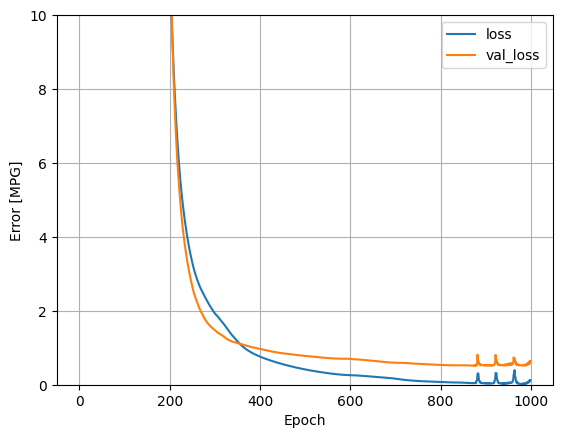

In [113]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

In [114]:
y_pred_nn = model.predict(X_test_scaled)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


#### Evaluate

In [115]:
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = root_mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("Mean Squared Error:", mse_nn)
print("Root Mean Squared Error:", rmse_nn)
print("Mean Absolute Error:", mae_nn)
print("R-squared:", r2_nn)

Mean Squared Error: 1.583093265438996
Root Mean Squared Error: 1.2582103422874078
Mean Absolute Error: 0.5928530685806261
R-squared: 0.9999756668084172


In [116]:
results = model.evaluate(X_test_scaled, y_test, verbose=0)
results

[1.428451418876648, 1.583093285560608]

## Comparison and choose the best model

In [117]:
score = ['MSE', 'RMSE', 'MAE', 'R-squared']

Ridge_before = [mse_ridge, rmse_ridge, mae_ridge, r2_ridge]
Ridge_after = [mse_ridge_after, rmse_ridge_after, mae_ridge_after, r2_ridge_after]

Lasso_before = [mse_lasso, rmse_lasso, mae_lasso, r2_lasso]
Lasso_after = [mse_lasso_after, rmse_lasso_after, mae_lasso_after, r2_lasso_after]

SGD_before = [mse_sgd, rmse_sgd, mae_sgd, r2_sgd]
SGD_after = [mse_sgd_after, rmse_sgd_after, mae_sgd_after, r2_sgd_after]

RandomForest_before = [mse_rf, rmse_rf, mae_rf, r2_rf]
RandomForest_after = [mse_rf_after, rmse_rf_after, mae_rf_after, r2_rf_after]

LR_before = [mse_lr, rmse_lr, mae_lr, r2_lr]
NN_before = [mse_nn, rmse_nn, mae_nn, r2_nn]

blogs = pd.DataFrame({
                      'score': score, 
                      'Ridge_before': Ridge_before, 
                      'Ridge_after': Ridge_after, 
                      'Lasso_before': Lasso_before,
                      'Lasso_after': Lasso_after, 
                      'SGD_before': SGD_before, 
                      'SGD_after': SGD_after,
                      'RandomForest_before': RandomForest_before, 
                      'RandomForest_after': RandomForest_after,
                      'LR_before': LR_before,
                      'LR_after': -1,
                      'NN_before': NN_before,
                      'NN_after': -1
                     })

#### Visualize comparison of each method

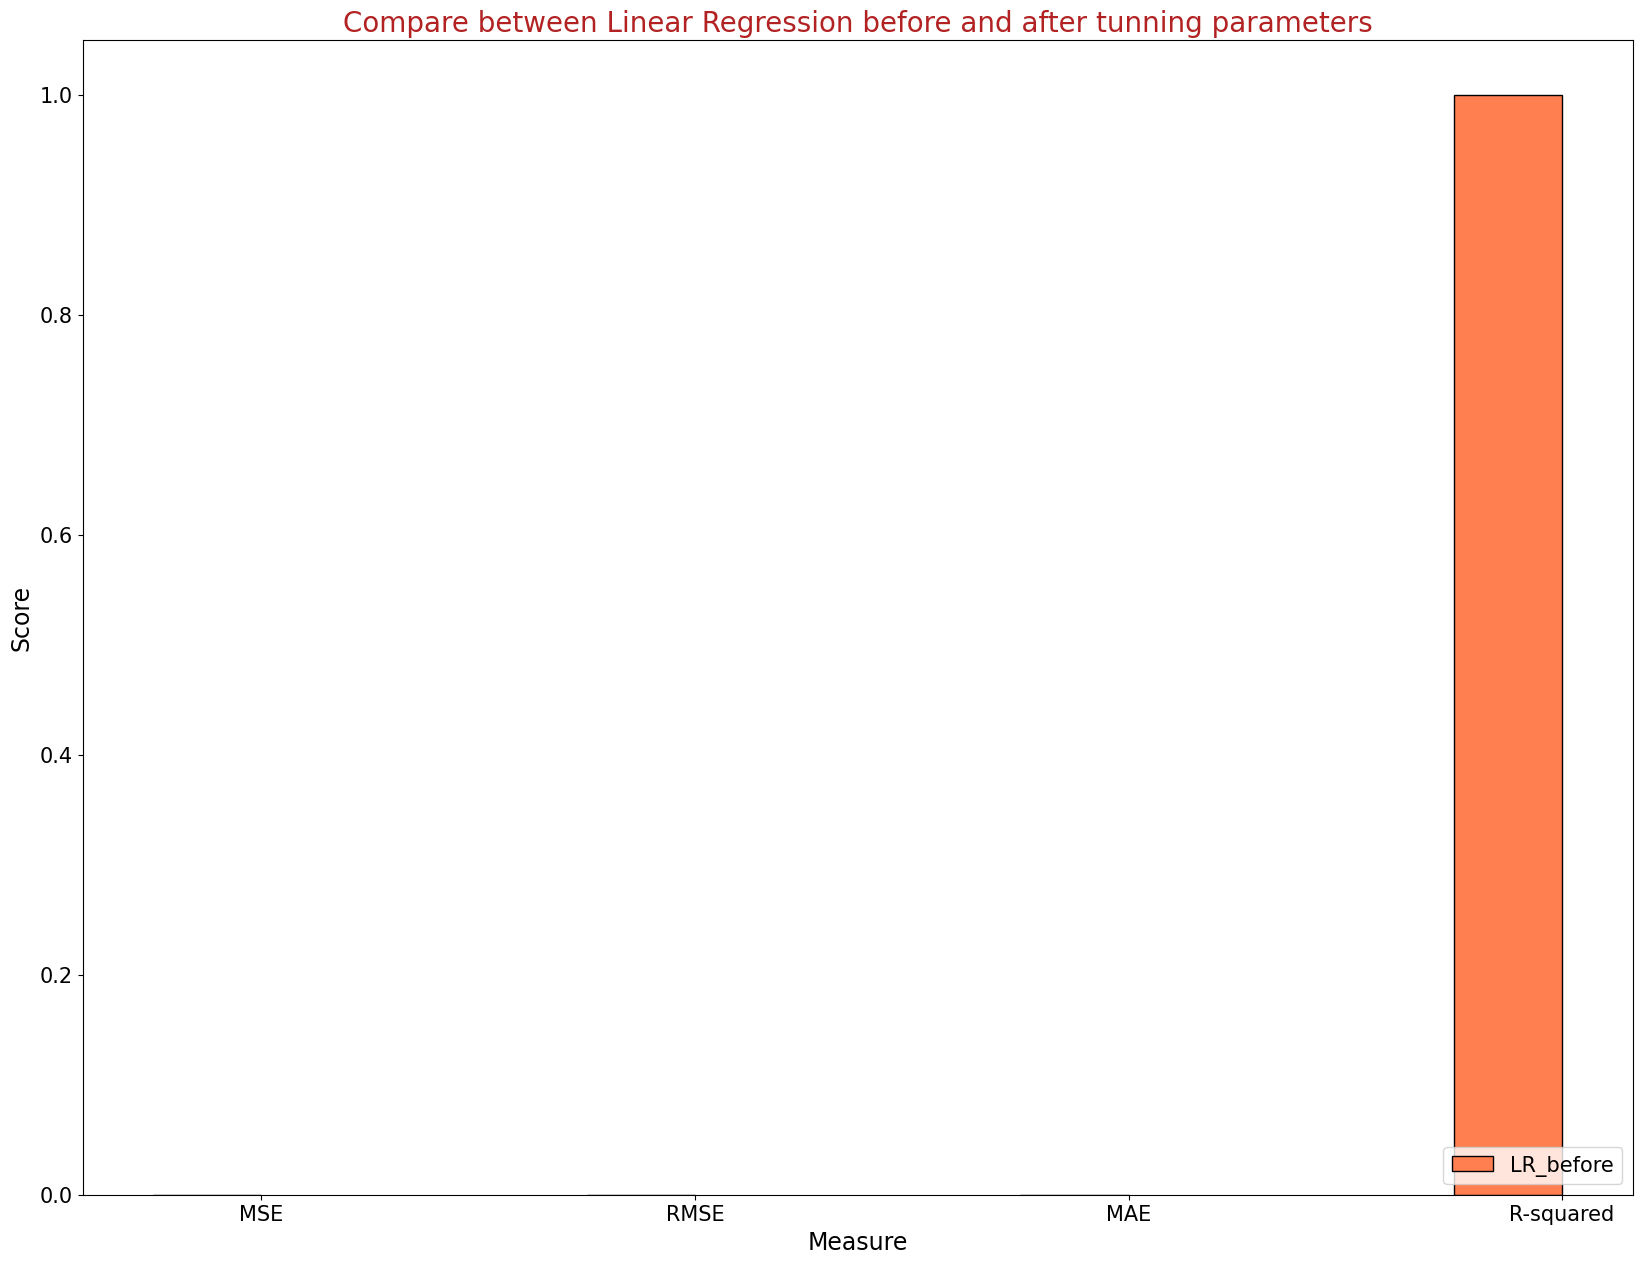

In [118]:
# Visualizing the data with multiple bar chart
plt.figure(figsize=[20, 15])

# Set the width of the bars
wd = 0.5
x_pos = np.arange(1, 2*len(blogs), 2)

# Plotting the multiple bar graphs on the same figure
plt.bar(x_pos, blogs.LR_before, color='coral', width=wd, edgecolor='k', label='LR_before')

# Add xticks
plt.xticks(x_pos+(wd*0.5), blogs.score.values, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Compare between Linear Regression before and after tunning parameters', fontsize=20, color='firebrick')
plt.xlabel('Measure', fontsize=17)
plt.ylabel('Score', fontsize=17)

plt.legend(loc='lower right', fontsize=15)
plt.show()

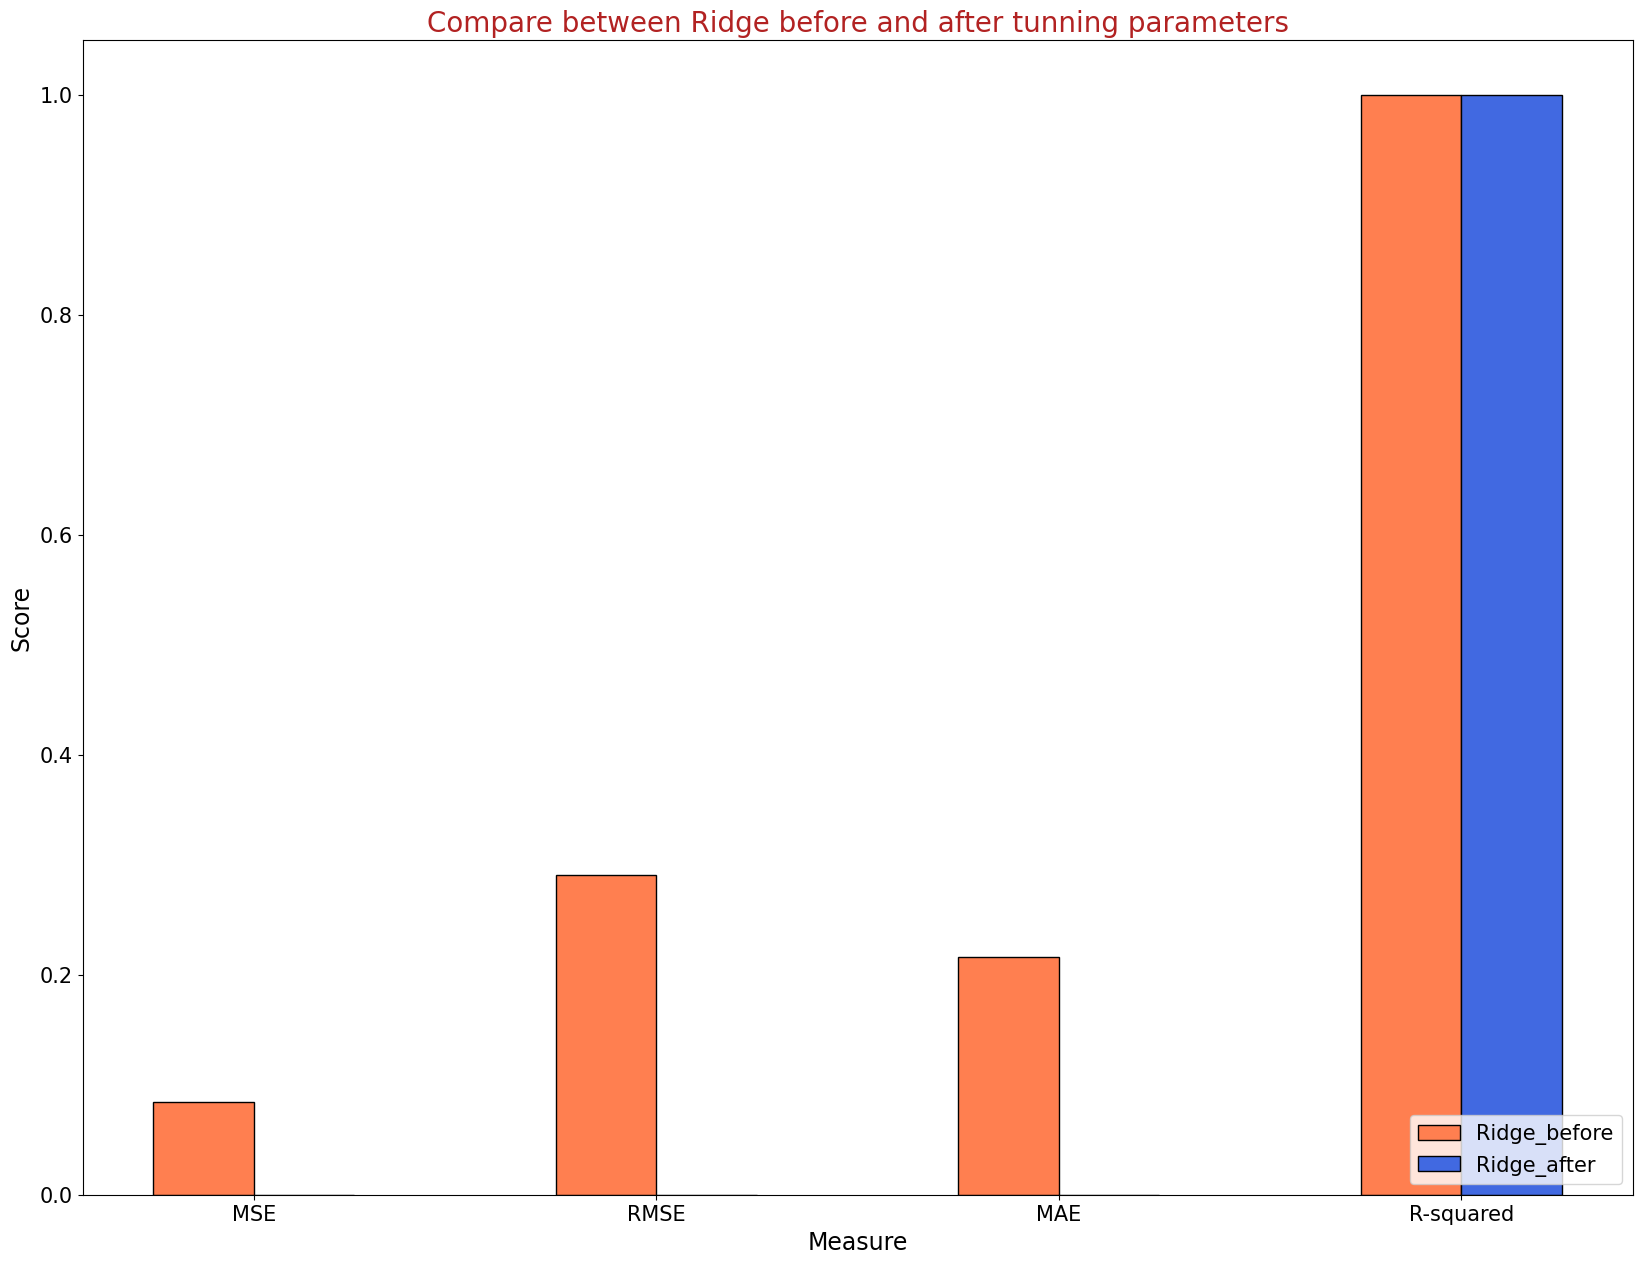

In [119]:
# Visualizing the data with multiple bar chart
plt.figure(figsize=[20, 15])

# Set the width of the bars
wd = 0.5
x_pos = np.arange(1, 2*len(blogs), 2)

# Plotting the multiple bar graphs on the same figure
plt.bar(x_pos, blogs.Ridge_before, color='coral', width=wd, edgecolor='k', label='Ridge_before')
plt.bar(x_pos+wd, blogs.Ridge_after, color='royalblue', width=wd, edgecolor='k', label='Ridge_after')

# Add xticks
plt.xticks(x_pos+(wd*0.5), blogs.score.values, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Compare between Ridge before and after tunning parameters', fontsize=20, color='firebrick')
plt.xlabel('Measure', fontsize=17)
plt.ylabel('Score', fontsize=17)

plt.legend(loc='lower right', fontsize=15)
plt.show()

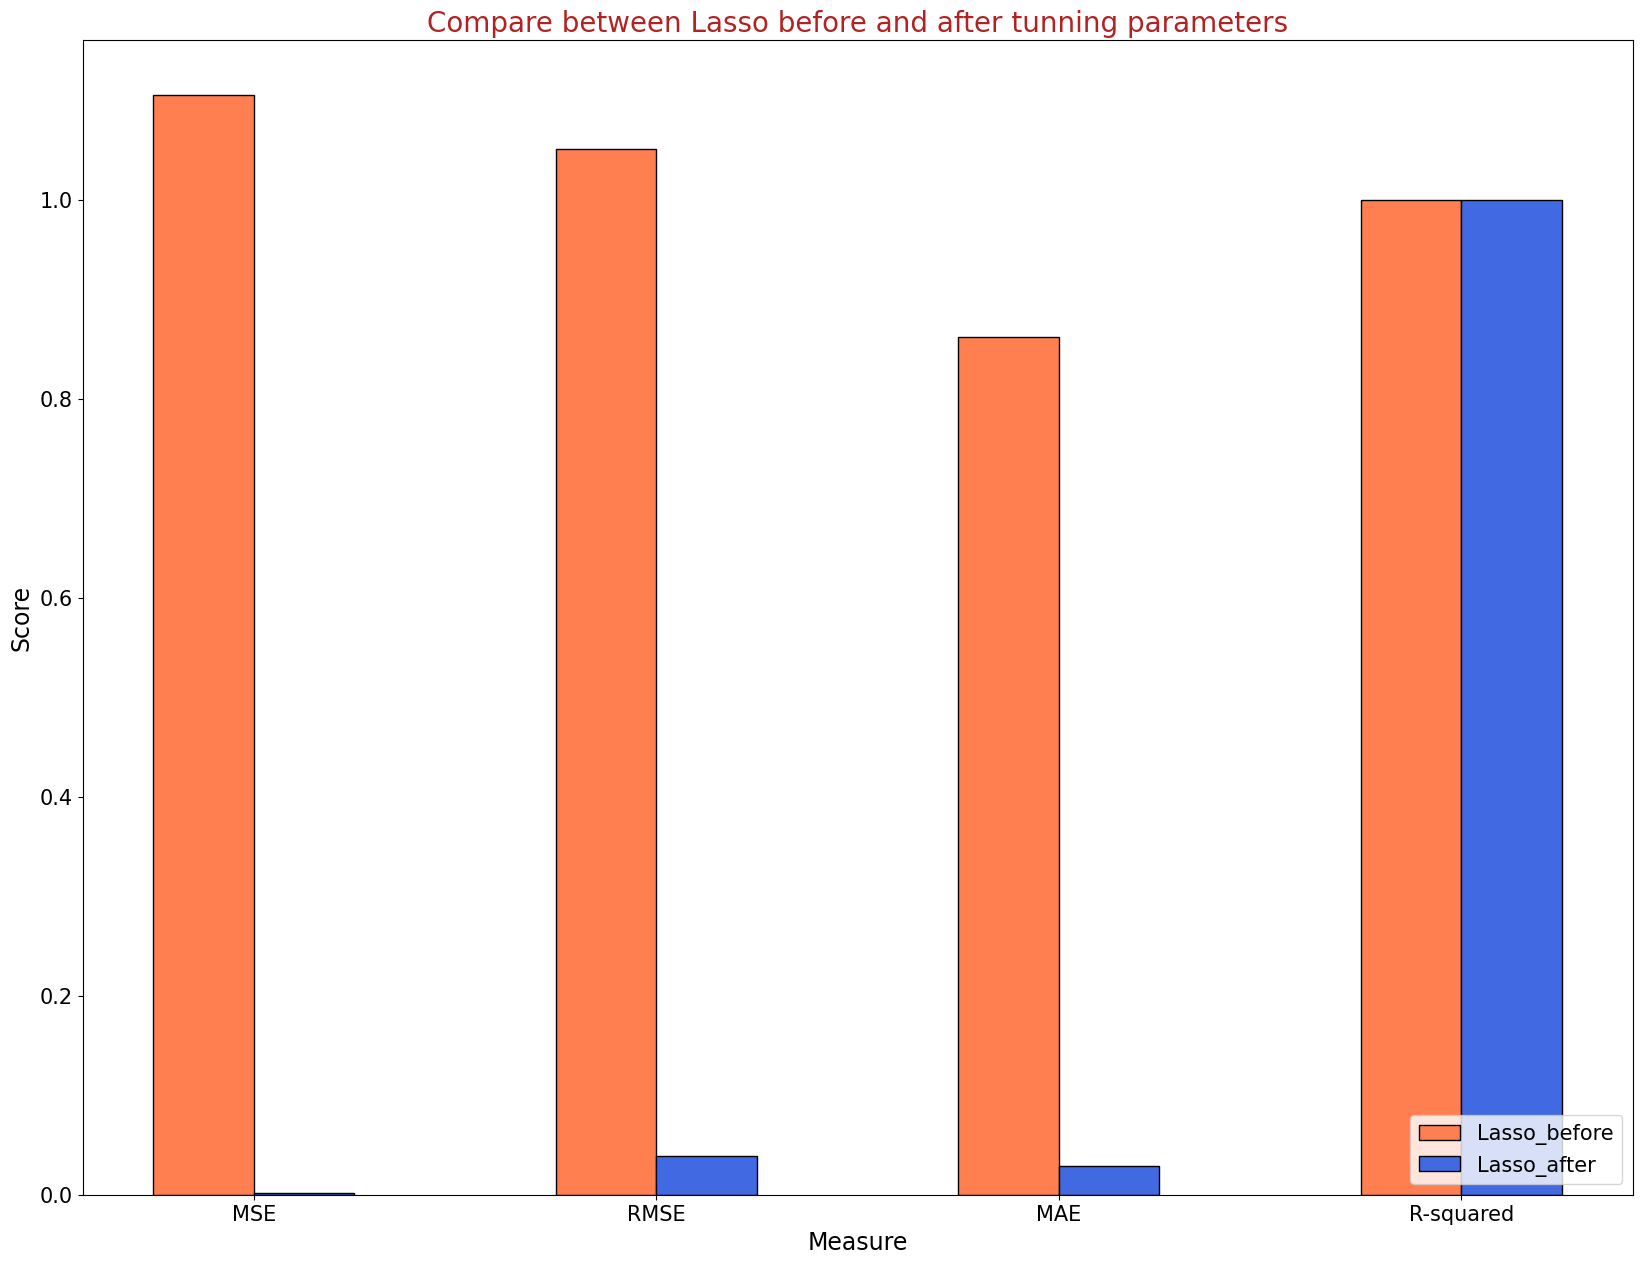

In [120]:
# Visualizing the data with multiple bar chart
plt.figure(figsize=[20, 15])

# Set the width of the bars
wd = 0.5
x_pos = np.arange(1, 2*len(blogs), 2)

# Plotting the multiple bar graphs on the same figure
plt.bar(x_pos, blogs.Lasso_before, color='coral', width=wd, edgecolor='k', label='Lasso_before')
plt.bar(x_pos+wd, blogs.Lasso_after, color='royalblue', width=wd, edgecolor='k', label='Lasso_after')

# Add xticks
plt.xticks(x_pos+(wd*0.5), blogs.score.values, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Compare between Lasso before and after tunning parameters', fontsize=20, color='firebrick')
plt.xlabel('Measure', fontsize=17)
plt.ylabel('Score', fontsize=17)

plt.legend(loc='lower right', fontsize=15)
plt.show()

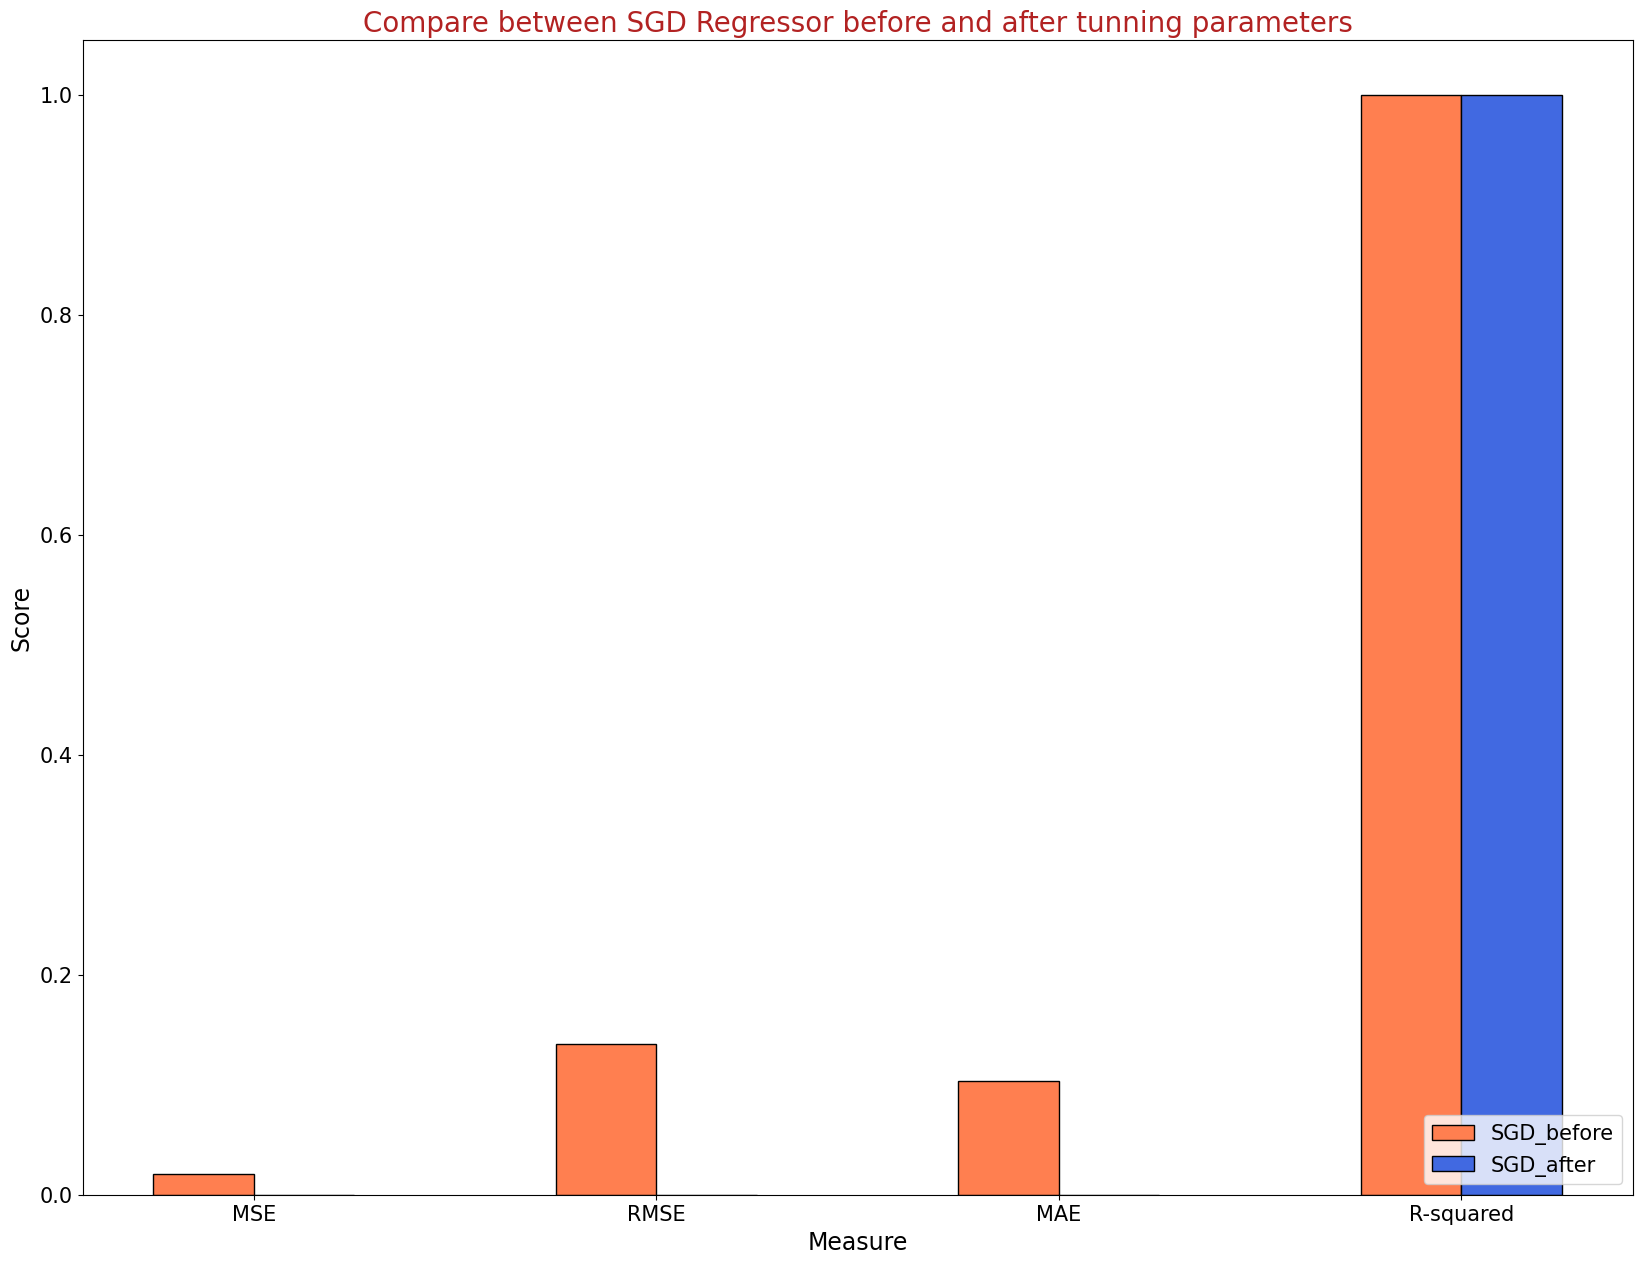

In [121]:
# Visualizing the data with multiple bar chart
plt.figure(figsize=[20, 15])

# Set the width of the bars
wd = 0.5
x_pos = np.arange(1, 2*len(blogs), 2)

# Plotting the multiple bar graphs on the same figure
plt.bar(x_pos, blogs.SGD_before, color='coral', width=wd, edgecolor='k', label='SGD_before')
plt.bar(x_pos+wd, blogs.SGD_after, color='royalblue', width=wd, edgecolor='k', label='SGD_after')

# Add xticks
plt.xticks(x_pos+(wd*0.5), blogs.score.values, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Compare between SGD Regressor before and after tunning parameters', fontsize=20, color='firebrick')
plt.xlabel('Measure', fontsize=17)
plt.ylabel('Score', fontsize=17)

plt.legend(loc='lower right', fontsize=15)
plt.show()

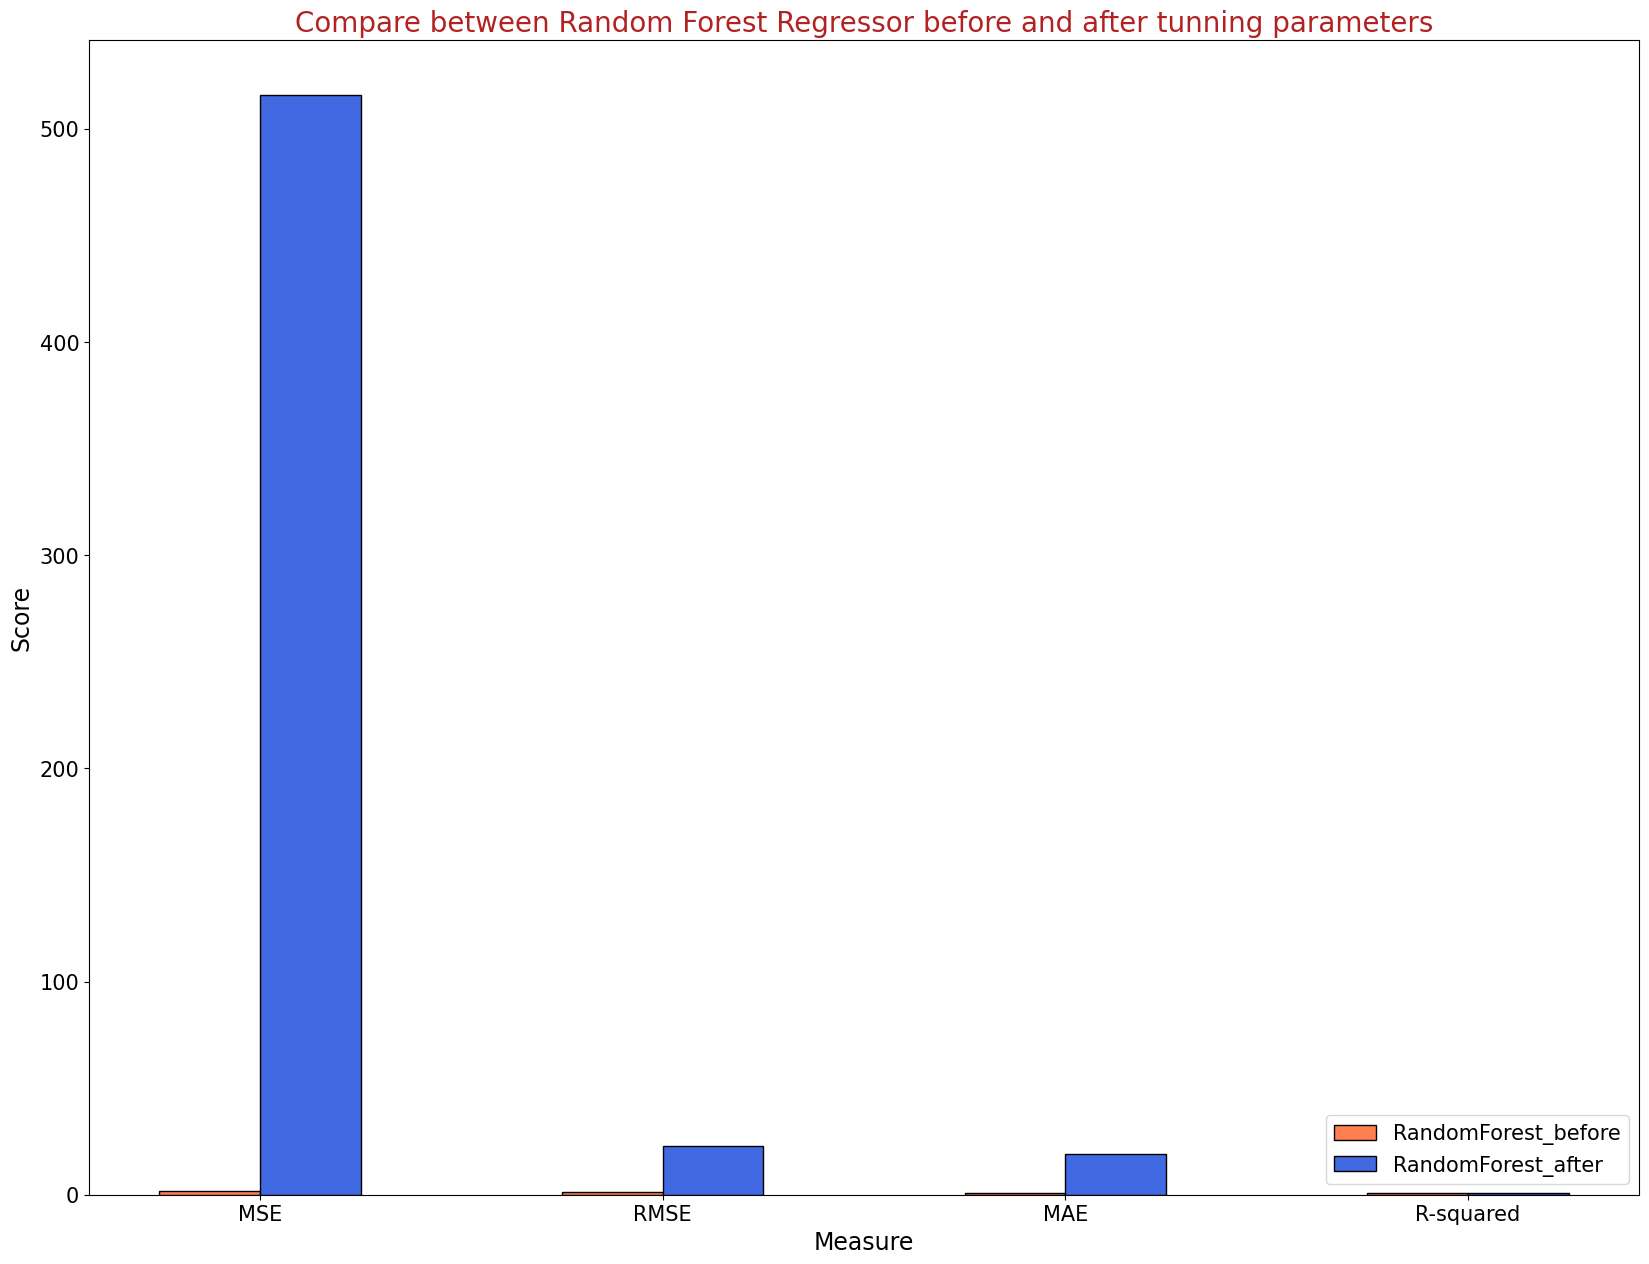

In [122]:
# Visualizing the data with multiple bar chart
plt.figure(figsize=[20, 15])

# Set the width of the bars
wd = 0.5
x_pos = np.arange(1, 2*len(blogs), 2)

# Plotting the multiple bar graphs on the same figure
plt.bar(x_pos, blogs.RandomForest_before, color='coral', width=wd, edgecolor='k', label='RandomForest_before')
plt.bar(x_pos+wd, blogs.RandomForest_after, color='royalblue', width=wd, edgecolor='k', label='RandomForest_after')

# Add xticks
plt.xticks(x_pos+(wd*0.5), blogs.score.values, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Compare between Random Forest Regressor before and after tunning parameters', fontsize=20, color='firebrick')
plt.xlabel('Measure', fontsize=17)
plt.ylabel('Score', fontsize=17)

plt.legend(loc='lower right', fontsize=15)
plt.show()

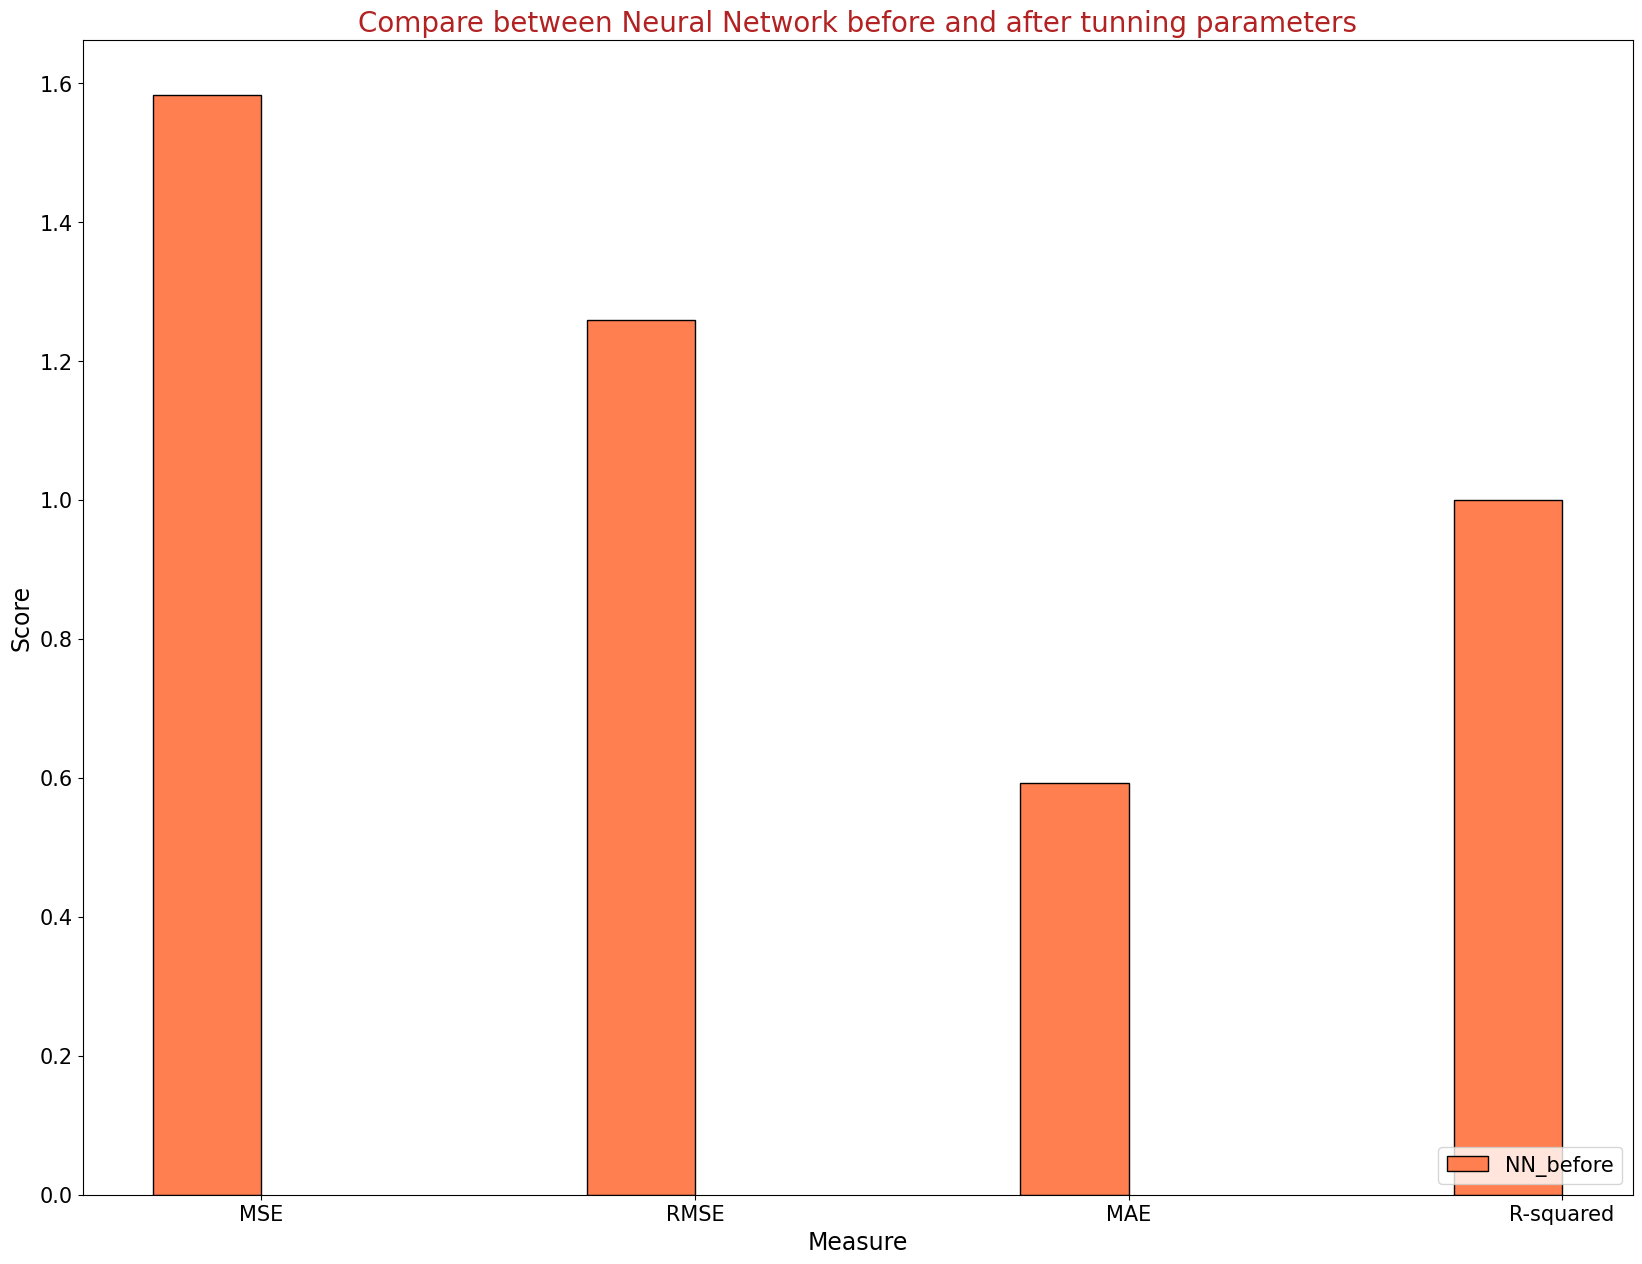

In [123]:
# Visualizing the data with multiple bar chart
plt.figure(figsize=[20, 15])

# Set the width of the bars
wd = 0.5
x_pos = np.arange(1, 2*len(blogs), 2)

# Plotting the multiple bar graphs on the same figure
plt.bar(x_pos, blogs.NN_before, color='coral', width=wd, edgecolor='k', label='NN_before')

# Add xticks
plt.xticks(x_pos+(wd*0.5), blogs.score.values, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Compare between Neural Network before and after tunning parameters', fontsize=20, color='firebrick')
plt.xlabel('Measure', fontsize=17)
plt.ylabel('Score', fontsize=17)

plt.legend(loc='lower right', fontsize=15)
plt.show()

#### Visualize comparison between methods

##### Before tuning

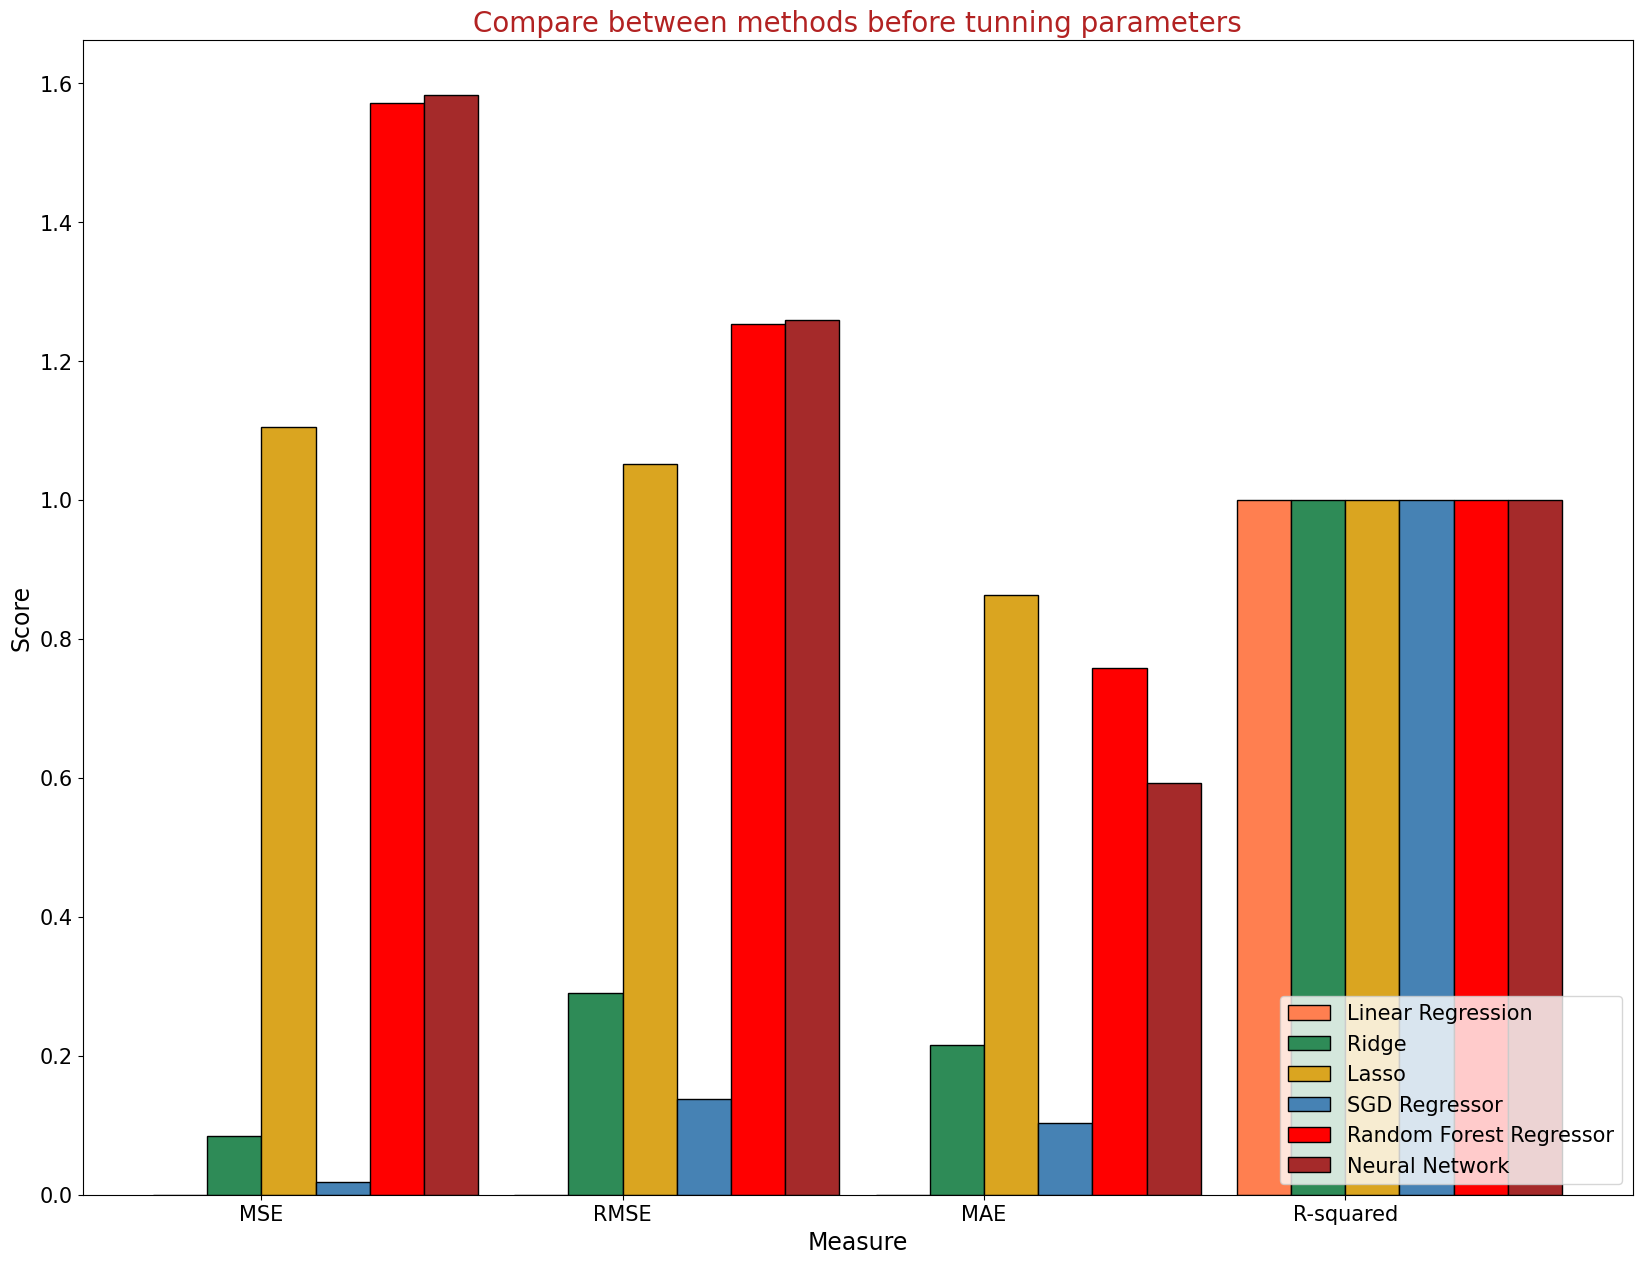

In [124]:
# Visualizing the data with multiple bar chart
plt.figure(figsize=[20, 15])

# Set the width of the bars
wd = 0.3
x_pos = np.arange(1, 2*len(blogs), 2)

# Plotting the multiple bar graphs on the same figure
plt.bar(x_pos, blogs.LR_before, color='coral', width=wd, edgecolor='k', label='Linear Regression')
plt.bar(x_pos+wd, blogs.Ridge_before, color='seagreen', width=wd, edgecolor='k',  label='Ridge')
plt.bar(x_pos+(wd*2), blogs.Lasso_before, color='goldenrod', width=wd, edgecolor='k', label='Lasso')
plt.bar(x_pos+(wd*3), blogs.SGD_before, color='steelblue', width=wd, edgecolor='k', label='SGD Regressor')
plt.bar(x_pos+(wd*4), blogs.RandomForest_before, color='red', width=wd, edgecolor='k', label='Random Forest Regressor')
plt.bar(x_pos+(wd*5), blogs.NN_before, color='brown', width=wd, edgecolor='k', label='Neural Network')

# Add xticks
plt.xticks(x_pos+(wd*1.5), blogs.score.values, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Compare between methods before tunning parameters', fontsize=20, color='firebrick')
plt.xlabel('Measure', fontsize=17)
plt.ylabel('Score', fontsize=17)

plt.legend(loc='lower right', fontsize=15)
plt.show()

##### After Tuning

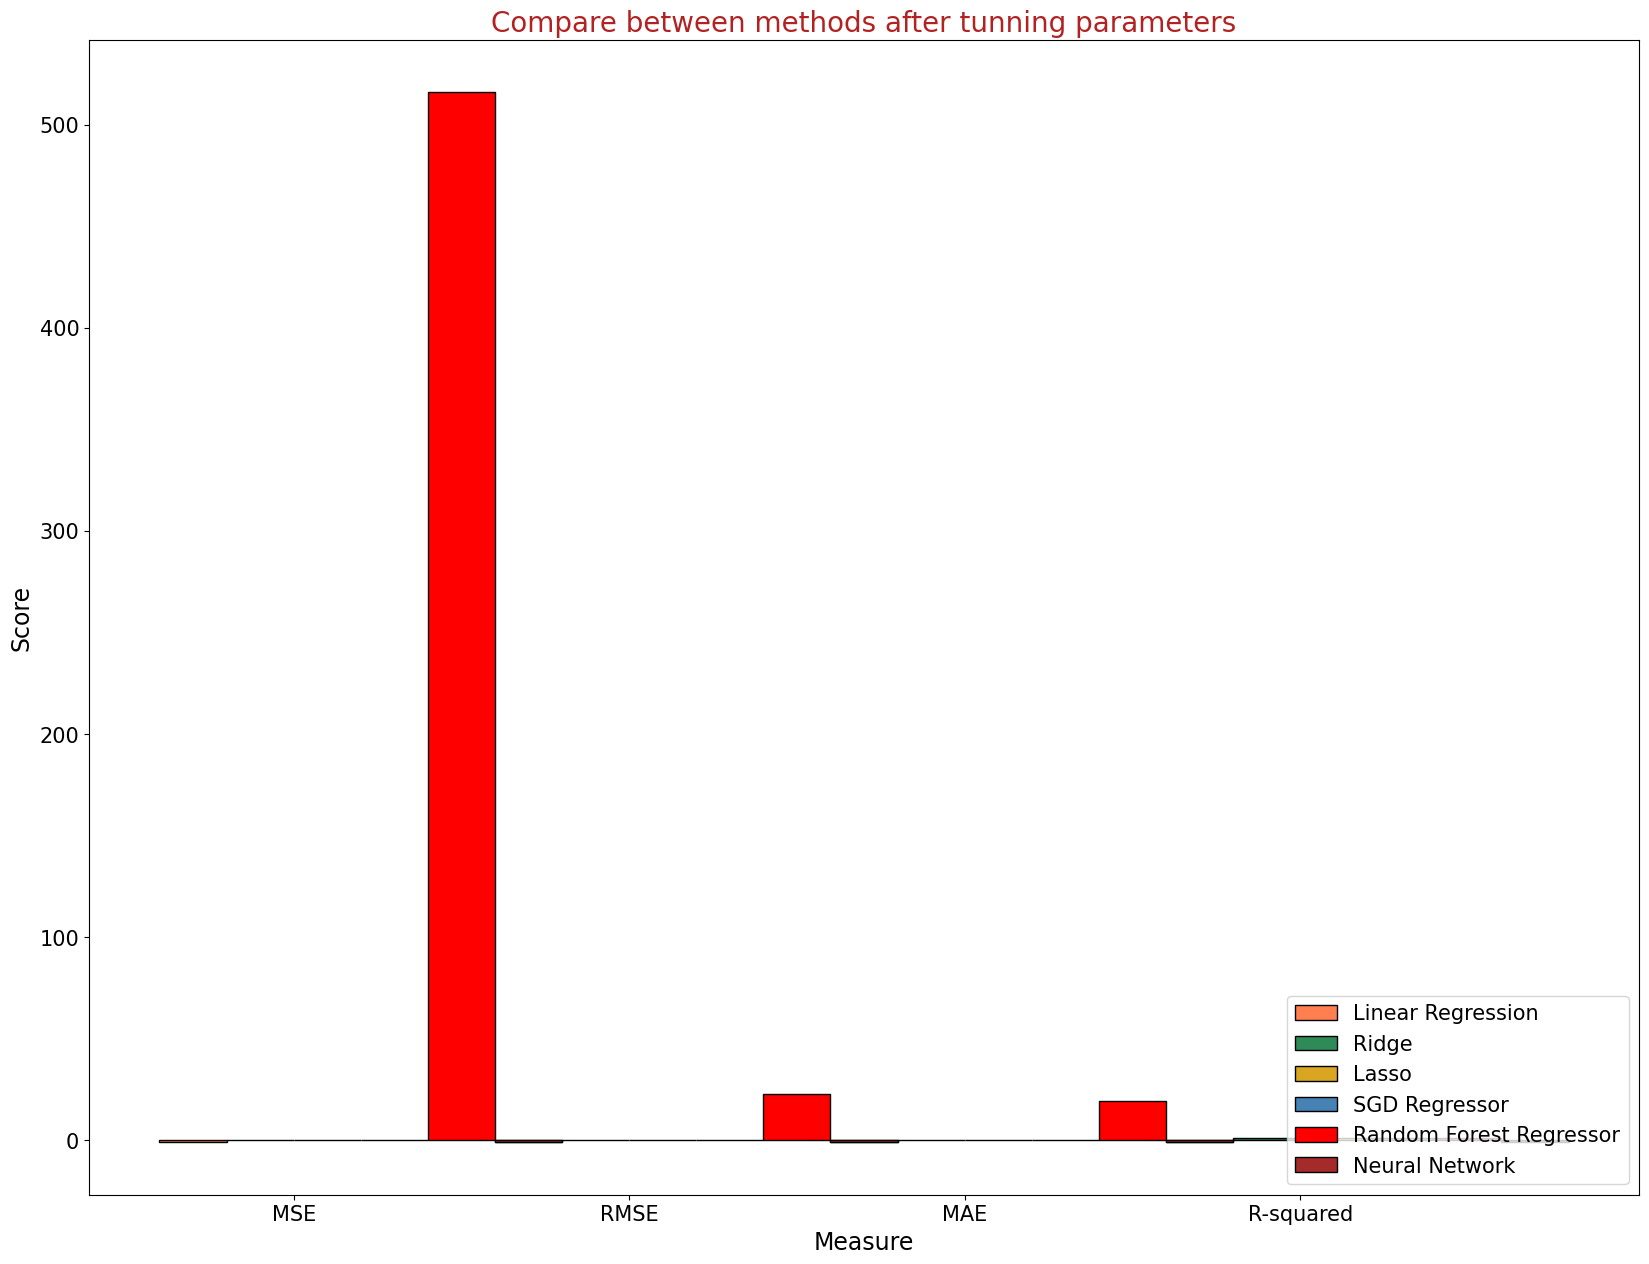

In [125]:
# Visualizing the data with multiple bar chart
plt.figure(figsize=[20, 15])

# Set the width of the bars
wd = 0.4
x_pos = np.arange(1, 2*len(blogs), 2)

# Plotting the multiple bar graphs on the same figure
plt.bar(x_pos, blogs.LR_after, color='coral', width=wd, edgecolor='k', label='Linear Regression')
plt.bar(x_pos+wd, blogs.Ridge_after, color='seagreen', width=wd, edgecolor='k',  label='Ridge')
plt.bar(x_pos+(wd*2), blogs.Lasso_after, color='goldenrod', width=wd, edgecolor='k', label='Lasso')
plt.bar(x_pos+(wd*3), blogs.SGD_after, color='steelblue', width=wd, edgecolor='k', label='SGD Regressor')
plt.bar(x_pos+(wd*4), blogs.RandomForest_after, color='red', width=wd, edgecolor='k', label='Random Forest Regressor')
plt.bar(x_pos+(wd*5), blogs.NN_after, color='brown', width=wd, edgecolor='k', label='Neural Network')

# Add xticks
plt.xticks(x_pos+(wd*1.5), blogs.score.values, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Compare between methods after tunning parameters', fontsize=20, color='firebrick')
plt.xlabel('Measure', fontsize=17)
plt.ylabel('Score', fontsize=17)

plt.legend(loc='lower right', fontsize=15)
plt.show()

#### Comparison

In [131]:
blogs

# -1 means that there is no hyperparameter tuning for that algorithm

score  Ridge_before   Ridge_after  Lasso_before  Lasso_after  \
0        MSE      0.084650  8.693802e-18      1.105494     0.001534   
1       RMSE      0.290946  2.948525e-09      1.051425     0.039168   
2        MAE      0.215836  2.187084e-09      0.862412     0.028482   
3  R-squared      0.999999  1.000000e+00      0.999983     1.000000   

   SGD_before     SGD_after  RandomForest_before  RandomForest_after  \
0    0.018898  5.967512e-27             1.571033          515.965899   
1    0.137471  7.724967e-14             1.253408           22.714883   
2    0.103157  5.821121e-14             0.757371           19.055146   
3    1.000000  1.000000e+00             0.999976            0.992069   

      LR_before  LR_after  NN_before  NN_after  
0  3.540124e-26        -1   1.583093        -1  
1  1.881522e-13        -1   1.258210        -1  
2  1.544187e-13        -1   0.592853        -1  
3  1.000000e+00        -1   0.999976        -1

## Conclusion

#### Base on this dataframe, the model has the best performance is SGD Regressor after hyperparameter tuning due to its lowest MSE, RMSE, MAE and highest R-squared. Therefore, I will choose the main model for this regression task is SGD Regressor after hyperparameter tuning.

#### Visualization: Predicted vs. Actual Values of SGD Regressor

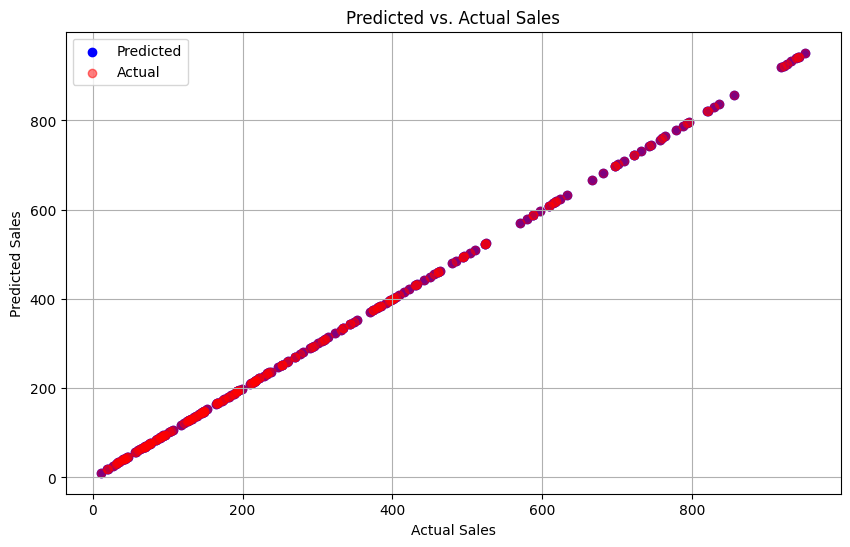

In [127]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_sgd_after, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Predicted vs. Actual Sales')
plt.legend()
plt.grid(True)
plt.show()

## Save the best model and scaler

In [128]:
# save model
pickle.dump(sgd_after, open('sgd_regressor_best_model.pkl', "wb"))

# save scaler
pickle.dump(standard_scaler, open('standard_scaler.pkl', 'wb'))

In [129]:
# load model
loaded_model = pickle.load(open('sgd_regressor_best_model.pkl', "rb"))

# Use loaded model to compute predictions
y_predicted = loaded_model.predict(X_test_scaled)

In [130]:
y_predicted.shape

(200,)